In [ ]:
The code is written by Ahmad Reza Sedghi

## 1 

In [5]:
import pandas as pd

# Read the CSV files
products_df = pd.read_csv("BaSalam.products.csv")
reviews_df = pd.read_csv("BaSalam.reviews.csv")

column_names = products_df.columns.tolist()
print(column_names)

column_names = reviews_df.columns.tolist()
print(column_names)




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Zohre Karimi\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Zoh

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Zohre Karimi\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Zoh

AttributeError: _ARRAY_API not found

C:\Users\Zohre Karimi\AppData\Local\Temp\ipykernel_10700\1802788393.py:4: DtypeWarning: Columns (18,35,36,37,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  products_df = pd.read_csv("BaSalam.products.csv")
C:\Users\Zohre Karimi\AppData\Local\Temp\ipykernel_10700\1802788393.py:5: DtypeWarning: Columns (11,12,30) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_df = pd.read_csv("BaSalam.reviews.csv")


['_id', '_score', 'sales_count_week', 'name', 'price', 'status_id', 'status_title', 'stock', 'photo_MEDIUM', 'photo_SMALL', 'rating_average', 'rating_count', 'rating_signals', 'primaryPrice', 'preparationDays', 'weight', 'categoryId', 'has_delivery', 'has_variation', 'new_categoryId', 'navigation_id', 'vendor_name', 'vendor_identifier', 'vendor_statusId', 'vendor_freeShippingToIran', 'vendor_freeShippingToSameCity', 'vendor_cityId', 'vendor_provinceId', 'vendor_has_delivery', 'vendor_score', 'vendor_id', 'vendor_status_id', 'vendor_status_title', 'vendor_owner_city', 'vendor_owner_id', 'isFreeShipping', 'IsAvailable', 'IsSaleable', 'mainAttribute', 'categoryTitle', 'published', 'video_ORIGINAL', 'promotions']
['_id', 'productId', 'star', 'user_id', 'isPost', 'isPublic', 'id', 'createdAt', 'updatedAt', 'hashId', 'isPosted', 'isLikedByCurrentUser', 'isDislikedByCurrentUser', 'likeCount', 'dislikeCount', 'attachments', 'history_count', 'user_id_of_user', 'name_of_user', 'hash_id_of_user',

In [10]:
# Merge reviews with products on the productId and _id columns
merged_df = reviews_df.merge(products_df, left_on='productId', right_on='_id', how='inner')

# Select only the desired columns
result_df = merged_df[['user_id', 'productId', 'star','categoryId', 'vendor_identifier',  'vendor_cityId', 'name' ,'categoryTitle']]
user_rating_counts = result_df['user_id'].value_counts()
# Users with at least 5 ratings
users_to_keep = user_rating_counts[user_rating_counts >= 5].index

# Count ratings per product
product_rating_counts = result_df['productId'].value_counts()
# Products with at least 2 ratings
products_to_keep = product_rating_counts[product_rating_counts >= 2].index

# Filter the DataFrame
filtered_df = result_df[
    (result_df['user_id'].isin(users_to_keep)) &
    (result_df['productId'].isin(products_to_keep))
]


filtered_df.rename(columns={'productid': 'product_id', 'categoryId':'category_id','vendor_cityId':'vendor_city_id','vendor_identifier':'vendor_id','name':'product_name','categoryTitle':'category_name'}, inplace=True)


# Assuming your DataFrame is named 'df'
# Count the number of each rating
rating_counts = filtered_df['star'].value_counts()

# Find the minimum count across ratings
min_count = rating_counts.min()

# For each rating, sample min_count rows
balanced_df_list = []
for star_rating in rating_counts.index:
    sampled_rows = filtered_df[filtered_df['star'] == star_rating].sample(n=min_count, random_state=42)
    balanced_df_list.append(sampled_rows)

# Concatenate all sampled rows to get the balanced DataFrame
balanced_df = pd.concat(balanced_df_list)

# Reset index if needed
balanced_df.reset_index(drop=True, inplace=True)


# Save the result to a pickle file
balanced_df.to_pickle("basalam_dataset_5.pkl")

C:\Users\Zohre Karimi\AppData\Local\Temp\ipykernel_19024\2773774311.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'productid': 'product_id', 'categoryId':'category_id','vendor_cityId':'vendor_city_id','vendor_identifier':'vendor_id','name':'product_name','categoryTitle':'category_name'}, inplace=True)


In [1]:
# Upgrade pip first (optional but recommended)
!pip install --upgrade pip

# Downgrade numpy to less than 2 (if you haven't already)
!pip install numpy<2

# Reinstall or upgrade matplotlib
!pip install --upgrade --force-reinstall matplotlib


Defaulting to user installation because normal site-packages is not writeable
                                              0.0/1.8 MB ? eta -:--:--
                                              0.0/1.8 MB 660.6 kB/s eta 0:00:03
                                              0.0/1.8 MB 660.6 kB/s eta 0:00:03
     -                                        0.1/1.8 MB 327.7 kB/s eta 0:00:06
     --                                       0.1/1.8 MB 476.3 kB/s eta 0:00:04
     --                                       0.1/1.8 MB 393.8 kB/s eta 0:00:05
     --                                       0.1/1.8 MB 409.6 kB/s eta 0:00:05
     ----                                     0.2/1.8 MB 562.0 kB/s eta 0:00:03
     -----                                    0.2/1.8 MB 627.5 kB/s eta 0:00:03
     ------                                   0.3/1.8 MB 630.9 kB/s eta 0:00:03
     -------                                  0.4/1.8 MB 742.3 kB/s eta 0:00:02
     --------                                 0.4/1

ERROR: To modify pip, please run the following command:
C:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
The system cannot find the file specified.


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
                                              0.0/221.2 kB ? eta -:--:--
     -----                                   30.7/221.2 kB 1.4 MB/s eta 0:00:01
     -----                                   30.7/221.2 kB 1.4 MB/s eta 0:00:01
     ----------                            61.4/221.2 kB 365.7 kB/s eta 0:00:01
     ---------------                       92.2/221.2 kB 476.3 kB/s eta 0:00:01
     ---------------                       92.2/221.2 kB 476.3 kB/s eta 0:00:01
     ------------------------             153.6/221.2 kB 510.2 kB/s eta 0:00:01
     ---------------------------------    204.8/221.2 kB 655.1 kB/s eta 0:00:01
     ------------------------------------ 221.2/221.2 kB 562.5 kB/s eta 0:00:00
                                              0.0/2.2 MB ? eta -:--:--
     --                                       0.1/2.2 MB 4.3 MB/s eta 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Zohre Karimi\\AppData\\Roaming\\Python\\Python310\\site-packages\\~umpy.libs\\libscipy_openblas64_-c16e4918366c6bc1f1cd71e28ca36fc0.dll'
Check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!where python

C:\ProgramData\anaconda3\python.exe
C:\Users\Zohre Karimi\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\Zohre Karimi\AppData\Local\Microsoft\WindowsApps\python.exe


In [13]:
import matplotlib.pyplot as plt

# Plot histogram of the 'star' ratings
balanced_df['star'].value_counts().sort_index().plot(kind='bar')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings')

plt.show()

AttributeError: '_ArtistPropertiesSubstitution' object has no attribute 'register'

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import ndcg_score

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

def dcg2_cal(rank_scores):
    s = np.arange(2, len(rank_scores) + 2)
    x = 2 ** rank_scores
    dcg2 = np.sum((x - 1) / np.log2(s))
    return dcg2

def ndcg_cal(r, scores, k):
    k = min(k, len(r))
    pos = np.argsort(r)[::-1]
    recom_list = pos[:k]
    rank_scores = scores[recom_list]
    m = dcg2_cal(rank_scores)
    real_scores = np.sort(rank_scores)[::-1][:k]
    n = dcg2_cal(real_scores)
    ndcg = m / n if n > 0 else 0.0
    return ndcg

def calculate_mean_ndcg(model, X_val_user, X_val_item, y_val, scaler, k_list=[5, 10]):
    val_preds = model.predict([X_val_user, X_val_item])
    val_preds = scaler.inverse_transform(val_preds).flatten()
    val_true = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
    
    user_ndcg_values = {k: [] for k in k_list}
    
    for user_id in np.unique(X_val_user):
        user_indices = np.where(X_val_user == user_id)[0]
        user_true_scores = val_true[user_indices]
        user_pred_scores = val_preds[user_indices]
        
        for k in k_list:
            ndcg_value = ndcg_cal(user_pred_scores, user_true_scores, k)
            user_ndcg_values[k].append(ndcg_value)
    
    mean_ndcg_values = {k: np.mean(user_ndcg_values[k]) for k in k_list}
    
    return mean_ndcg_values

def load_data():
    data = pd.read_pickle('/kaggle/input/basalam-100k-data/basalam_dataset_5.pkl')
    return data

df = load_data()

user_encoder = LabelEncoder()
product_encoder = LabelEncoder()

df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['product_id'] = product_encoder.fit_transform(df['product_id'])

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['user_id'], random_state=42)
X_train = train_df.drop(columns=['star'])
y_train = train_df['star']
X_val = val_df.drop(columns=['star'])
y_val = val_df['star']

scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler.transform(y_val.values.reshape(-1, 1))

X_train_user = np.array(X_train['user_id'])
X_train_item = np.array(X_train['product_id'])
X_val_user = np.array(X_val['user_id'])
X_val_item = np.array(X_val['product_id'])

y_train = np.array(y_train).reshape(-1)
y_val = np.array(y_val).reshape(-1)

num_users = len(df['user_id'].unique())
num_items = len(df['product_id'].unique())



train_mae_values = []
train_mse_values = []
train_rmse_values = []

val_mae_values = []
val_mse_values = []
val_rmse_values = []

ndcg_5_values = []
ndcg_10_values = []


def create_model(embedding_dim=32, hidden_size=32, dropout_rate=0.4, l2_lambda=0.005):
    user_input = tf.keras.layers.Input(shape=(1,), name='user_input')
    item_input = tf.keras.layers.Input(shape=(1,), name='item_input')

    user_emb = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(user_input)
    item_emb = tf.keras.layers.Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(item_input)

    user_emb = tf.keras.layers.Flatten()(user_emb)
    item_emb = tf.keras.layers.Flatten()(item_emb)


    user_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(user_emb)
    user_emb = tf.keras.layers.BatchNormalization()(user_emb)
    user_emb = tf.keras.layers.Dropout(dropout_rate)(user_emb)
    
    item_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(item_emb)
    item_emb = tf.keras.layers.BatchNormalization()(item_emb)
    item_emb = tf.keras.layers.Dropout(dropout_rate)(item_emb)
    

    x = tf.keras.layers.Concatenate()([user_emb, item_emb])

    x = tf.keras.layers.Dense(hidden_size, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=[user_input, item_input], outputs=output)

    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='mse')

    return model


fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    model_instance = create_model()

    history = model_instance.fit(
        [X_train_user, X_train_item], 
        y_train, 
        validation_data=([X_val_user, X_val_item], y_val), 
        epochs=10, 
        batch_size=256,
        verbose=1,
        shuffle=True
    )

    ax = axs[i//5, i%5]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(f'Run {i+1}')
    ax.legend()

    train_preds = model_instance.predict([X_train_user, X_train_item])
    val_preds = model_instance.predict([X_val_user, X_val_item])

    train_preds = scaler.inverse_transform(train_preds)
    val_preds = scaler.inverse_transform(val_preds)
    y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_val_inverse = scaler.inverse_transform(y_val.reshape(-1, 1))

    train_mae, train_mse, train_rmse = calculate_metrics(y_train_inverse, train_preds)
    val_mae, val_mse, val_rmse = calculate_metrics(y_val_inverse, val_preds)

    train_mae_values.append(train_mae)
    train_mse_values.append(train_mse)
    train_rmse_values.append(train_rmse)

    val_mae_values.append(val_mae)
    val_mse_values.append(val_mse)
    val_rmse_values.append(val_rmse)

    mean_ndcg_values = calculate_mean_ndcg(model_instance, X_val_user, X_val_item, y_val, scaler)
    ndcg_5_values.append(mean_ndcg_values[5])
    ndcg_10_values.append(mean_ndcg_values[10])

    print(f"Run {i+1} Training Metrics: MAE = {train_mae:.4f}, MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}")
    print(f"Run {i+1} Validation Metrics: MAE = {val_mae:.4f}, MSE = {val_mse:.4f}, RMSE = {val_rmse:.4f}")
    print(f"Run {i+1} NDCG@5: {mean_ndcg_values[5]:.4f}, NDCG@10: {mean_ndcg_values[10]:.4f}\n")


plt.tight_layout()
plt.show()  
    
    

mean_train_mae = np.mean(train_mae_values)
std_train_mae = np.std(train_mae_values)
mean_train_mse = np.mean(train_mse_values)
std_train_mse = np.std(train_mse_values)
mean_train_rmse = np.mean(train_rmse_values)
std_train_rmse = np.std(train_rmse_values)

mean_val_mae = np.mean(val_mae_values)
std_val_mae = np.std(val_mae_values)
mean_val_mse = np.mean(val_mse_values)
std_val_mse = np.std(val_mse_values)
mean_val_rmse = np.mean(val_rmse_values)
std_val_rmse = np.std(val_rmse_values)

mean_ndcg_5 = np.mean(ndcg_5_values)
std_ndcg_5 = np.std(ndcg_5_values)
mean_ndcg_10 = np.mean(ndcg_10_values)
std_ndcg_10 = np.std(ndcg_10_values)


print(f'Mean Train MAE: {mean_train_mae:.4f} ± {std_train_mae:.4f}')
print(f'Mean Validation MAE: {mean_val_mae:.4f} ± {std_val_mae:.4f}\n')

print(f'Mean Train MSE: {mean_train_mse:.4f} ± {std_train_mse:.4f}')
print(f'Mean Validation MSE: {mean_val_mse:.4f} ± {std_val_mse:.4f}\n')

print(f'Mean Train RMSE: {mean_train_rmse:.4f} ± {std_train_rmse:.4f}')
print(f'Mean Validation RMSE: {mean_val_rmse:.4f} ± {std_val_rmse:.4f}\n')

print(f'Mean NDCG@5: {mean_ndcg_5:.4f} ± {std_ndcg_5:.4f}')
print(f'Mean NDCG@10: {mean_ndcg_10:.4f} ± {std_ndcg_10:.4f}\n')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Zohre Karimi\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Zoh

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\ProgramData\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Zohre Karimi\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Zoh

AttributeError: _ARRAY_API not found

ImportError: Traceback (most recent call last):
  File "C:\Users\Zohre Karimi\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

## 2

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - loss: 1.3485 - val_loss: 0.1664
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1513 - val_loss: 0.1455
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1429 - val_loss: 0.1373
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1368 - val_loss: 0.1359
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1341 - val_loss: 0.1342
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1305 - val_loss: 0.1258
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1226 - val_loss: 0.1244
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1226 - val_loss: 0.1213
Epoch 9/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1171 - val_loss: 0.1180
Epoch 10/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1158 - val_loss: 0.1229
2505/2505 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Run 1 Traini

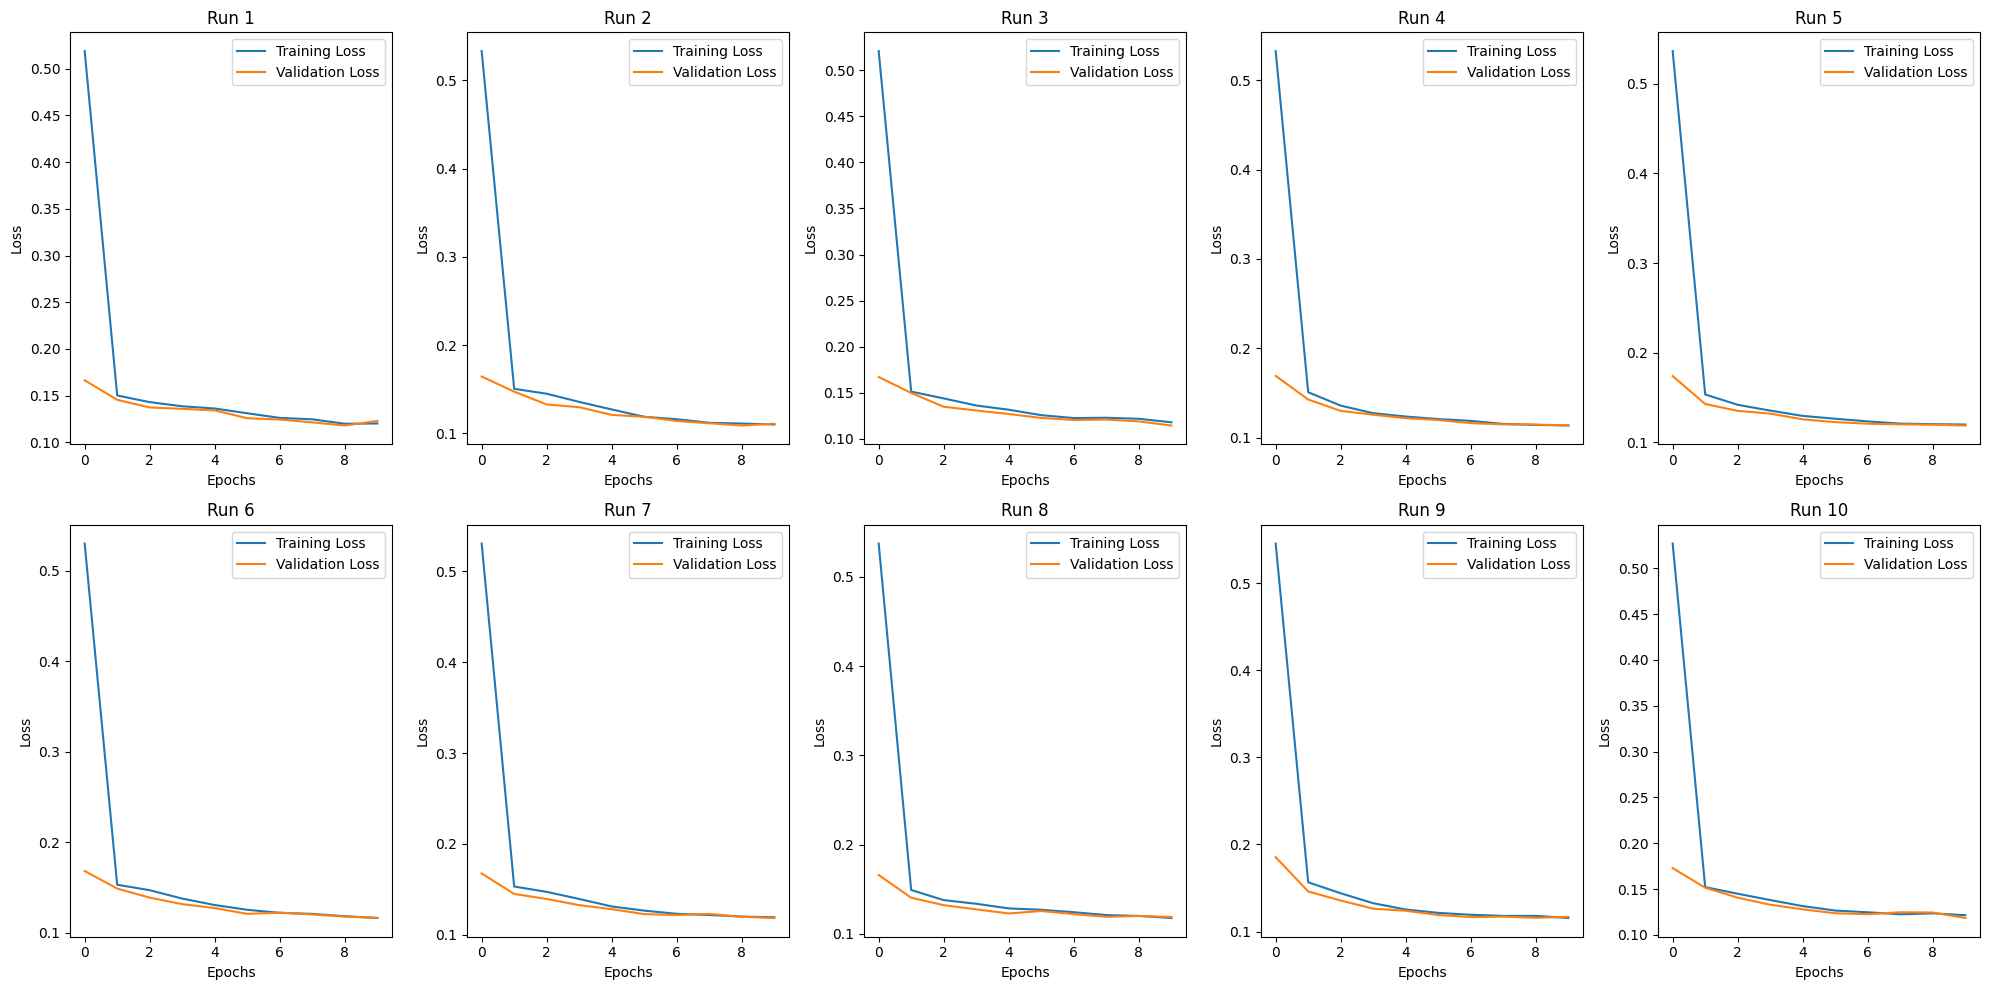

Mean Train MAE: 0.8293 ± 0.0109
Mean Validation MAE: 0.9053 ± 0.0093

Mean Train MSE: 1.0726 ± 0.0160
Mean Validation MSE: 1.2825 ± 0.0113

Mean Train RMSE: 1.0356 ± 0.0077
Mean Validation RMSE: 1.1324 ± 0.0050

Mean NDCG@5: 0.9737 ± 0.0004
Mean NDCG@10: 0.9735 ± 0.0004



In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, ndcg_score


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse


def dcg2_cal(rank_scores):
    s = np.arange(2, len(rank_scores) + 2)
    x = 2 ** rank_scores
    dcg2 = np.sum((x - 1) / np.log2(s))
    return dcg2

def ndcg_cal(r, scores, k):
    k = min(k, len(r))
    pos = np.argsort(r)[::-1]
    recom_list = pos[:k]
    rank_scores = scores[recom_list]
    m = dcg2_cal(rank_scores)
    real_scores = np.sort(rank_scores)[::-1][:k]
    n = dcg2_cal(real_scores)
    ndcg = m / n if n > 0 else 0.0
    return ndcg

def calculate_mean_ndcg(model, X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, y_val, scaler, k_list=[5, 10]):
    val_preds = model.predict([X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city])
    val_preds = scaler.inverse_transform(val_preds).flatten()
    val_true = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
    
    user_ndcg_values = {k: [] for k in k_list}
    
    for user_id in np.unique(X_val_user):
        user_indices = np.where(X_val_user == user_id)[0]
        user_true_scores = val_true[user_indices]
        user_pred_scores = val_preds[user_indices]
        
        for k in k_list:
            ndcg_value = ndcg_cal(user_pred_scores, user_true_scores, k)
            user_ndcg_values[k].append(ndcg_value)
    
    mean_ndcg_values = {k: np.mean(user_ndcg_values[k]) for k in k_list}
    
    return mean_ndcg_values

def load_data():
    data = pd.read_pickle('/kaggle/input/basalam-100k-data/basalam_dataset_5.pkl')
    return data

df = load_data()

user_encoder = LabelEncoder()
product_encoder = LabelEncoder()
category_encoder = LabelEncoder()
vendor_encoder = LabelEncoder()
vendor_city_encoder = LabelEncoder()

df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['product_id'] = product_encoder.fit_transform(df['product_id'])
df['category_id'] = category_encoder.fit_transform(df['category_id'])
df['vendor_id'] = vendor_encoder.fit_transform(df['vendor_id'])
df['vendor_city_id'] = vendor_city_encoder.fit_transform(df['vendor_city_id'])

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['user_id'], random_state=42)
X_train = train_df.drop(columns=['star'])
y_train = train_df['star']
X_val = val_df.drop(columns=['star'])
y_val = val_df['star']

scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler.transform(y_val.values.reshape(-1, 1))

X_train_user = np.array(X_train['user_id'])
X_train_item = np.array(X_train['product_id'])
X_train_category = np.array(X_train['category_id'])
X_train_vendor = np.array(X_train['vendor_id'])
X_train_vendor_city = np.array(X_train['vendor_city_id'])

X_val_user = np.array(X_val['user_id'])
X_val_item = np.array(X_val['product_id'])
X_val_category = np.array(X_val['category_id'])
X_val_vendor = np.array(X_val['vendor_id'])
X_val_vendor_city = np.array(X_val['vendor_city_id'])

y_train = np.array(y_train).reshape(-1)
y_val = np.array(y_val).reshape(-1)

num_users = len(df['user_id'].unique())
num_items = len(df['product_id'].unique())
num_categories = len(df['category_id'].unique())
num_vendors = len(df['vendor_id'].unique())
num_vendor_cities = len(df['vendor_city_id'].unique())



train_mae_values = []
train_mse_values = []
train_rmse_values = []

val_mae_values = []
val_mse_values = []
val_rmse_values = []

ndcg_5_values = []
ndcg_10_values = []

def create_model(embedding_dim=32, hidden_size=32, dropout_rate=0.4, l2_lambda=0.005):
    user_input = tf.keras.layers.Input(shape=(1,), name='user_input')
    item_input = tf.keras.layers.Input(shape=(1,), name='item_input')
    category_input = tf.keras.layers.Input(shape=(1,), name='category_input')
    vendor_input = tf.keras.layers.Input(shape=(1,), name='vendor_input')
    vendor_city_input = tf.keras.layers.Input(shape=(1,), name='vendor_city_input')

    user_emb = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(user_input)
    item_emb = tf.keras.layers.Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(item_input)
    category_emb = tf.keras.layers.Embedding(input_dim=num_categories, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(category_input)
    vendor_emb = tf.keras.layers.Embedding(input_dim=num_vendors, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(vendor_input)
    vendor_city_emb = tf.keras.layers.Embedding(input_dim=num_vendor_cities, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(vendor_city_input)

    user_emb = tf.keras.layers.Flatten()(user_emb)
    item_emb = tf.keras.layers.Flatten()(item_emb)
    category_emb = tf.keras.layers.Flatten()(category_emb)
    vendor_emb = tf.keras.layers.Flatten()(vendor_emb)
    vendor_city_emb = tf.keras.layers.Flatten()(vendor_city_emb)

    user_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(user_emb)
    user_emb = tf.keras.layers.BatchNormalization()(user_emb)
    user_emb = tf.keras.layers.Dropout(dropout_rate)(user_emb)
    
    item_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(item_emb)
    item_emb = tf.keras.layers.BatchNormalization()(item_emb)
    item_emb = tf.keras.layers.Dropout(dropout_rate)(item_emb)
    
    category_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(category_emb)
    category_emb = tf.keras.layers.BatchNormalization()(category_emb)
    category_emb = tf.keras.layers.Dropout(dropout_rate)(category_emb)
    
    vendor_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(vendor_emb)
    vendor_emb = tf.keras.layers.BatchNormalization()(vendor_emb)
    vendor_emb = tf.keras.layers.Dropout(dropout_rate)(vendor_emb)
    
    vendor_city_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(vendor_city_emb)
    vendor_city_emb = tf.keras.layers.BatchNormalization()(vendor_city_emb)
    vendor_city_emb = tf.keras.layers.Dropout(dropout_rate)(vendor_city_emb)


    x = tf.keras.layers.Concatenate()([user_emb, item_emb, category_emb, vendor_emb, vendor_city_emb])

    x = tf.keras.layers.Dense(hidden_size, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=[user_input, item_input, category_input, vendor_input, vendor_city_input], outputs=output)

    model.compile(optimizer='adam', loss='mse')

    return model



fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    model_instance = create_model()

    history = model_instance.fit(
        [X_train_user, X_train_item, X_train_category, X_train_vendor, X_train_vendor_city], 
        y_train, 
        validation_data=([X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city], y_val), 
        epochs=10, 
        batch_size=256,
        verbose=1,
        shuffle=True
    )

    ax = axs[i//5, i%5]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(f'Run {i+1}')
    ax.legend()

    train_preds = model_instance.predict([X_train_user, X_train_item, X_train_category, X_train_vendor, X_train_vendor_city])
    val_preds = model_instance.predict([X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city])

    train_preds = scaler.inverse_transform(train_preds)
    val_preds = scaler.inverse_transform(val_preds)
    y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_val_inverse = scaler.inverse_transform(y_val.reshape(-1, 1))

    train_mae, train_mse, train_rmse = calculate_metrics(y_train_inverse, train_preds)
    val_mae, val_mse, val_rmse = calculate_metrics(y_val_inverse, val_preds)

    train_mae_values.append(train_mae)
    train_mse_values.append(train_mse)
    train_rmse_values.append(train_rmse)

    val_mae_values.append(val_mae)
    val_mse_values.append(val_mse)
    val_rmse_values.append(val_rmse)

    mean_ndcg_values = calculate_mean_ndcg(model_instance, X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, y_val, scaler)
    ndcg_5_values.append(mean_ndcg_values[5])
    ndcg_10_values.append(mean_ndcg_values[10])

    print(f"Run {i+1} Training Metrics: MAE = {train_mae:.4f}, MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}")
    print(f"Run {i+1} Validation Metrics: MAE = {val_mae:.4f}, MSE = {val_mse:.4f}, RMSE = {val_rmse:.4f}")
    print(f"Run {i+1} NDCG@5: {mean_ndcg_values[5]:.4f}, NDCG@10: {mean_ndcg_values[10]:.4f}\n")


plt.tight_layout()
plt.show()  
    
    

mean_train_mae = np.mean(train_mae_values)
std_train_mae = np.std(train_mae_values)
mean_train_mse = np.mean(train_mse_values)
std_train_mse = np.std(train_mse_values)
mean_train_rmse = np.mean(train_rmse_values)
std_train_rmse = np.std(train_rmse_values)

mean_val_mae = np.mean(val_mae_values)
std_val_mae = np.std(val_mae_values)
mean_val_mse = np.mean(val_mse_values)
std_val_mse = np.std(val_mse_values)
mean_val_rmse = np.mean(val_rmse_values)
std_val_rmse = np.std(val_rmse_values)

mean_ndcg_5 = np.mean(ndcg_5_values)
std_ndcg_5 = np.std(ndcg_5_values)
mean_ndcg_10 = np.mean(ndcg_10_values)
std_ndcg_10 = np.std(ndcg_10_values)


print(f'Mean Train MAE: {mean_train_mae:.4f} ± {std_train_mae:.4f}')
print(f'Mean Validation MAE: {mean_val_mae:.4f} ± {std_val_mae:.4f}\n')

print(f'Mean Train MSE: {mean_train_mse:.4f} ± {std_train_mse:.4f}')
print(f'Mean Validation MSE: {mean_val_mse:.4f} ± {std_val_mse:.4f}\n')

print(f'Mean Train RMSE: {mean_train_rmse:.4f} ± {std_train_rmse:.4f}')
print(f'Mean Validation RMSE: {mean_val_rmse:.4f} ± {std_val_rmse:.4f}\n')

print(f'Mean NDCG@5: {mean_ndcg_5:.4f} ± {std_ndcg_5:.4f}')
print(f'Mean NDCG@10: {mean_ndcg_10:.4f} ± {std_ndcg_10:.4f}\n')


## 3

In [9]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
import numpy as np

df = pd.read_pickle('/kaggle/input/basalam-100k-data/basalam_dataset_5.pkl')

df['product_category'] = df['product_name'] + " " + df['category_name']
df_unique = df.drop_duplicates(subset='product_category', keep='first')

texts = df_unique['product_category'].tolist()

tokenizer = BertTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')
model = BertModel.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

token_lengths = []

for text in tqdm(df_unique['product_category'], desc="Calculating Token Lengths"):
    tokens = tokenizer.encode(text, add_special_tokens=True)
    token_lengths.append(len(tokens))

max_length = max(token_lengths)

print(f"Maximum token length in the unique product categories: {max_length}")


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Calculating Token Lengths: 100%|██████████| 29789/29789 [00:15<00:00, 1898.92it/s]

Maximum token length in the unique product categories: 55


In [10]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_pickle('/kaggle/input/basalam-100k-data/basalam_dataset_5.pkl')

df['product_category'] = df['product_name'] + " " + df['category_name']
df_unique = df.drop_duplicates(subset='product_category', keep='first')

texts = df_unique['product_category'].tolist()

tokenizer = BertTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')
model = BertModel.from_pretrained('HooshvareLab/bert-base-parsbert-uncased')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def get_cls_embeddings_batch(texts, batch_size=16):
    all_embeddings = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', truncation=True, padding=True, max_length=max_length)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.append(cls_embeddings)
    return np.vstack(all_embeddings)

embeddings = get_cls_embeddings_batch(texts)
embeddings_df = pd.DataFrame(embeddings, index=df_unique['product_category'])

def recommend_similar_products(product_name, product_titles, product_hidden_states_df, top_n=5):
    if product_name not in product_titles:
        raise ValueError("Product name not found in the titles list.")

    product_index = product_titles.index(product_name)
    target_hidden_state = product_hidden_states_df.iloc[product_index].values.reshape(1, -1)
    similarities = cosine_similarity(target_hidden_state, product_hidden_states_df.values).flatten()
    similar_indices = similarities.argsort()[::-1][1:top_n+1]
    similar_products = [(product_titles[i], similarities[i], df_unique['category_name'].iloc[i]) 
                        for i in similar_indices]
    return similar_products

example_product = df_unique['product_category'].iloc[0]
similar_products = recommend_similar_products(example_product, df_unique['product_category'].tolist(), embeddings_df, top_n=10)

print(f"Recommendations for '{example_product}':")
for product, similarity, category in similar_products:
    print(f"{product} (Category: {category}) (Similarity: {similarity:.4f})")

embeddings_df['Bert'] = embeddings_df.apply(lambda row: row.values, axis=1)
embeddings_df = embeddings_df[['Bert']]

df = df.merge(embeddings_df['Bert'], left_on='product_category', right_index=True, how='left')


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 1862/1862 [00:53<00:00, 35.10it/s]


Recommendations for 'گردنبند کارتیر نقره ای مردانه رنگ ثابت اکسسوری و زیور آلات زیورآلات مردانه':
انگشتر زنانه اویز پروانه دارای ابکاری قوی و رنگ ثابت زیورآلات زنانه (Category: زیورآلات زنانه) (Similarity: 0.8836)
انگشتر زنانه آویز پروانه دارای ابکاری بسیار قوی و رنگ ثابت زیورآلات زنانه (Category: زیورآلات زنانه) (Similarity: 0.8769)
مهره صدفی درجه یک رنگی کد1 زیورآلات زنانه (Category: زیورآلات زنانه) (Similarity: 0.8761)
زنجیر ویتالی نقره ای 60سانتی زیورآلات زنانه (Category: زیورآلات زنانه) (Similarity: 0.8749)
گوشواره طرح طلا رنگ ثابت با  کیفیت عالی  و بدون حساسیت زیورآلات زنانه (Category: زیورآلات زنانه) (Similarity: 0.8749)
دستبند و انگشتر بافت گیسویی تراش دار باریک زیورآلات زنانه (Category: زیورآلات زنانه) (Similarity: 0.8653)
انگشتر تک نگین استیل زنانه (طلایی و نقره ای) زیورآلات زنانه (Category: زیورآلات زنانه) (Similarity: 0.8640)
انگشترکارتیه زنانه طلاروس نگین دار ورنگ ثابت زیورآلات زنانه (Category: زیورآلات زنانه) (Similarity: 0.8630)
قلاب گوشواره استیل رنگ ثابت طرح عصایی زیور

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - loss: 1.3428 - val_loss: 0.1589
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1461 - val_loss: 0.1336
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1310 - val_loss: 0.1236
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1228 - val_loss: 0.1216
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1202 - val_loss: 0.1202
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1170 - val_loss: 0.1170
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1160 - val_loss: 0.1179
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1150 - val_loss: 0.1165
Epoch 9/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1149 - val_loss: 0.1161
Epoch 10/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1152 - val_loss: 0.1202
2505/2505 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Run 1 Traini

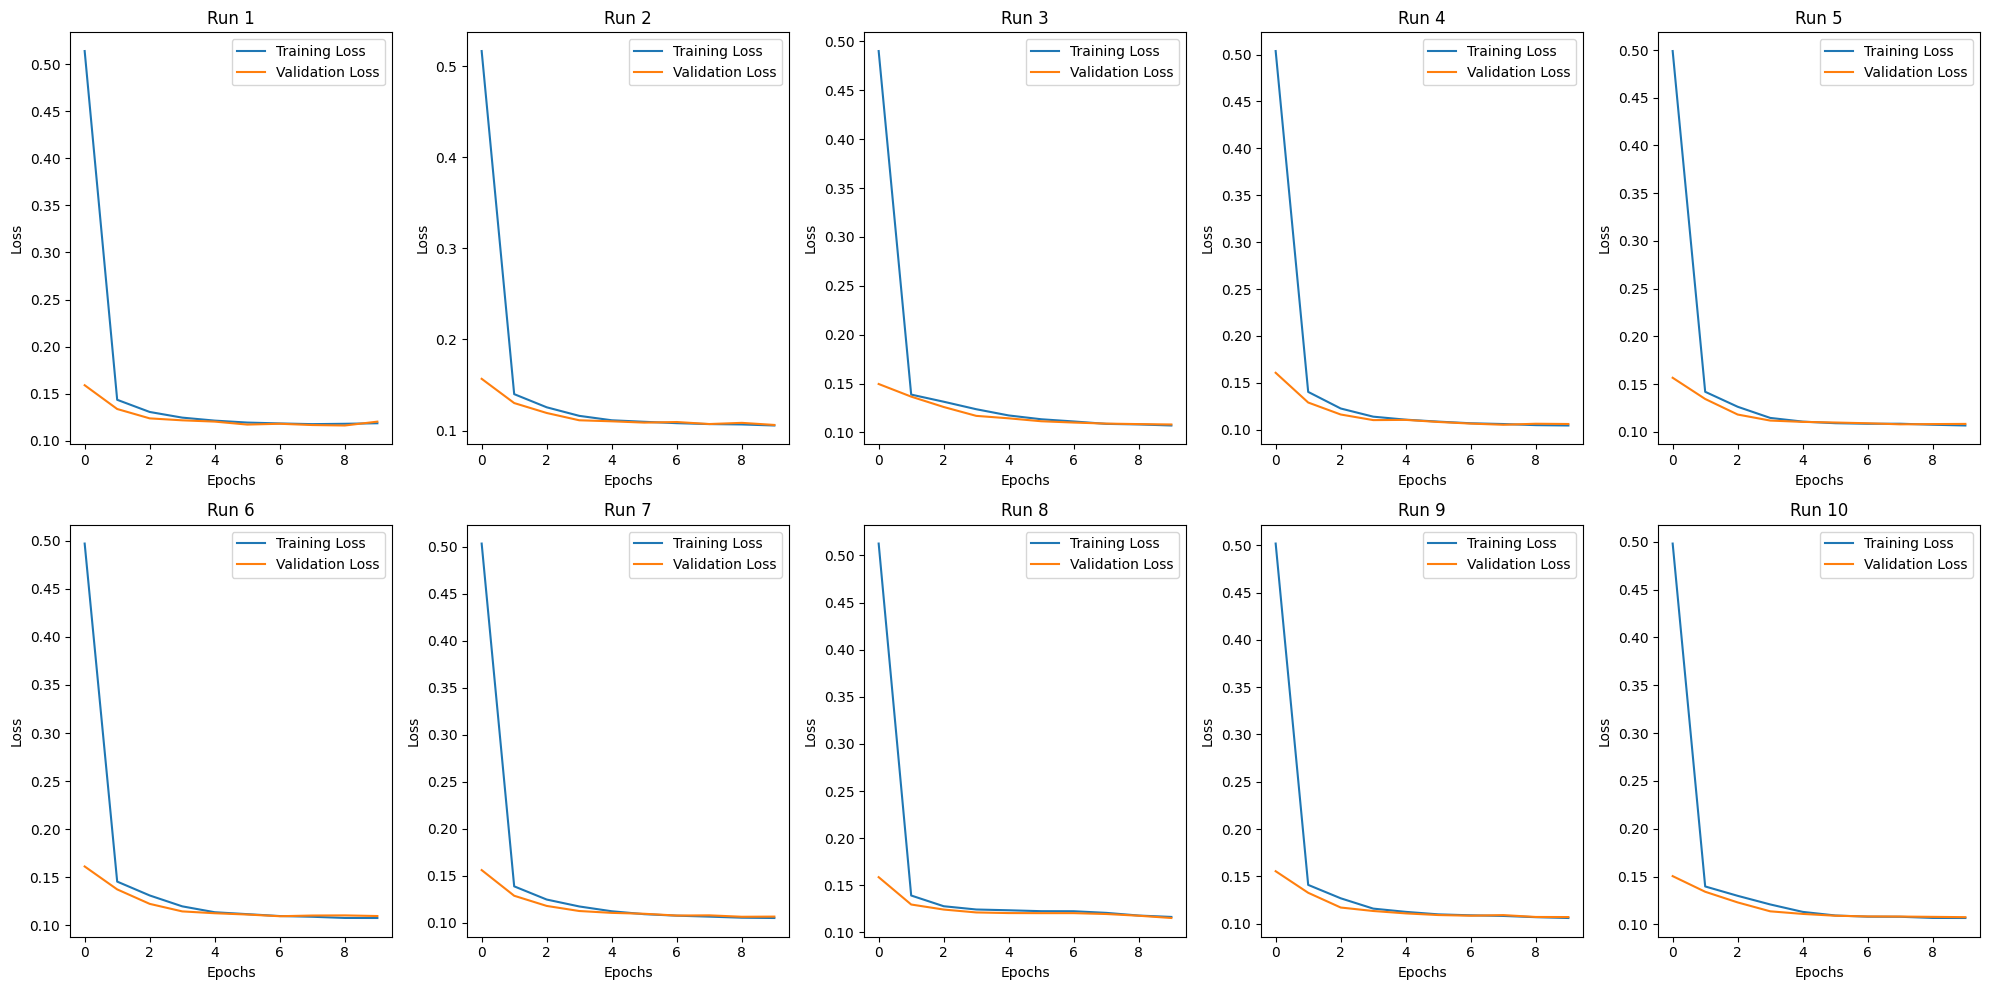

Mean Train MAE: 0.8172 ± 0.0095
Mean Validation MAE: 0.8962 ± 0.0072

Mean Train MSE: 1.0525 ± 0.0179
Mean Validation MSE: 1.2704 ± 0.0132

Mean Train RMSE: 1.0259 ± 0.0087
Mean Validation RMSE: 1.1271 ± 0.0058

Mean NDCG@5: 0.9743 ± 0.0003
Mean NDCG@10: 0.9741 ± 0.0003



In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, ndcg_score


def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse


def dcg2_cal(rank_scores):
    s = np.arange(2, len(rank_scores) + 2)
    x = 2 ** rank_scores
    dcg2 = np.sum((x - 1) / np.log2(s))
    return dcg2

def ndcg_cal(r, scores, k):
    k = min(k, len(r))
    pos = np.argsort(r)[::-1]
    recom_list = pos[:k]
    rank_scores = scores[recom_list]
    m = dcg2_cal(rank_scores)
    real_scores = np.sort(rank_scores)[::-1][:k]
    n = dcg2_cal(real_scores)
    ndcg = m / n if n > 0 else 0.0
    return ndcg

def calculate_mean_ndcg(model, X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert, y_val, scaler, k_list=[5, 10]):
    val_preds = model.predict([X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert])
    val_preds = scaler.inverse_transform(val_preds).flatten()
    val_true = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
    
    user_ndcg_values = {k: [] for k in k_list}
    
    for user_id in np.unique(X_val_user):
        user_indices = np.where(X_val_user == user_id)[0]
        user_true_scores = val_true[user_indices]
        user_pred_scores = val_preds[user_indices]
        
        for k in k_list:
            ndcg_value = ndcg_cal(user_pred_scores, user_true_scores, k)
            user_ndcg_values[k].append(ndcg_value)
    
    mean_ndcg_values = {k: np.mean(user_ndcg_values[k]) for k in k_list}
    
    return mean_ndcg_values


user_encoder = LabelEncoder()
product_encoder = LabelEncoder()
category_encoder = LabelEncoder()
vendor_encoder = LabelEncoder()
vendor_city_encoder = LabelEncoder()

df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['product_id'] = product_encoder.fit_transform(df['product_id'])
df['category_id'] = category_encoder.fit_transform(df['category_id'])
df['vendor_id'] = vendor_encoder.fit_transform(df['vendor_id'])
df['vendor_city_id'] = vendor_city_encoder.fit_transform(df['vendor_city_id'])

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['user_id'], random_state=42)
X_train = train_df.drop(columns=['star'])
y_train = train_df['star']
X_val = val_df.drop(columns=['star'])
y_val = val_df['star']

scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler.transform(y_val.values.reshape(-1, 1))

X_train_user = np.array(X_train['user_id'])
X_train_item = np.array(X_train['product_id'])
X_train_category = np.array(X_train['category_id'])
X_train_vendor = np.array(X_train['vendor_id'])
X_train_vendor_city = np.array(X_train['vendor_city_id'])
X_train_bert = np.array(X_train['Bert'].tolist())

X_val_user = np.array(X_val['user_id'])
X_val_item = np.array(X_val['product_id'])
X_val_category = np.array(X_val['category_id'])
X_val_vendor = np.array(X_val['vendor_id'])
X_val_vendor_city = np.array(X_val['vendor_city_id'])
X_val_bert = np.array(X_val['Bert'].tolist())

y_train = np.array(y_train).reshape(-1)
y_val = np.array(y_val).reshape(-1)

num_users = len(df['user_id'].unique())
num_items = len(df['product_id'].unique())
num_categories = len(df['category_id'].unique())
num_vendors = len(df['vendor_id'].unique())
num_vendor_cities = len(df['vendor_city_id'].unique())

bert_vector_size = X_train_bert.shape[1]


train_mae_values = []
train_mse_values = []
train_rmse_values = []

val_mae_values = []
val_mse_values = []
val_rmse_values = []

ndcg_5_values = []
ndcg_10_values = []


def create_model(embedding_dim=32, hidden_size=32, dropout_rate=0.4, l2_lambda=0.005):
    user_input = tf.keras.layers.Input(shape=(1,), name='user_input')
    item_input = tf.keras.layers.Input(shape=(1,), name='item_input')
    category_input = tf.keras.layers.Input(shape=(1,), name='category_input')
    vendor_input = tf.keras.layers.Input(shape=(1,), name='vendor_input')
    vendor_city_input = tf.keras.layers.Input(shape=(1,), name='vendor_city_input')
    bert_input = tf.keras.layers.Input(shape=(bert_vector_size,), name='bert_input')

    user_emb = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(user_input)
    item_emb = tf.keras.layers.Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(item_input)
    category_emb = tf.keras.layers.Embedding(input_dim=num_categories, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(category_input)
    vendor_emb = tf.keras.layers.Embedding(input_dim=num_vendors, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(vendor_input)
    vendor_city_emb = tf.keras.layers.Embedding(input_dim=num_vendor_cities, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(vendor_city_input)

    user_emb = tf.keras.layers.Flatten()(user_emb)
    item_emb = tf.keras.layers.Flatten()(item_emb)
    category_emb = tf.keras.layers.Flatten()(category_emb)
    vendor_emb = tf.keras.layers.Flatten()(vendor_emb)
    vendor_city_emb = tf.keras.layers.Flatten()(vendor_city_emb)

    user_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(user_emb)
    user_emb = tf.keras.layers.BatchNormalization()(user_emb)
    user_emb = tf.keras.layers.Dropout(dropout_rate)(user_emb)
    
    item_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(item_emb)
    item_emb = tf.keras.layers.BatchNormalization()(item_emb)
    item_emb = tf.keras.layers.Dropout(dropout_rate)(item_emb)
    
    category_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(category_emb)
    category_emb = tf.keras.layers.BatchNormalization()(category_emb)
    category_emb = tf.keras.layers.Dropout(dropout_rate)(category_emb)
    
    vendor_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(vendor_emb)
    vendor_emb = tf.keras.layers.BatchNormalization()(vendor_emb)
    vendor_emb = tf.keras.layers.Dropout(dropout_rate)(vendor_emb)
    
    vendor_city_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(vendor_city_emb)
    vendor_city_emb = tf.keras.layers.BatchNormalization()(vendor_city_emb)
    vendor_city_emb = tf.keras.layers.Dropout(dropout_rate)(vendor_city_emb)

    bert_input_processed = tf.keras.layers.Dense(hidden_size, activation='relu')(bert_input)
    bert_input_processed = tf.keras.layers.BatchNormalization()(bert_input_processed)
    bert_input_processed = tf.keras.layers.Dropout(dropout_rate)(bert_input_processed)

    x = tf.keras.layers.Concatenate()([user_emb, item_emb, category_emb, vendor_emb, vendor_city_emb, bert_input_processed])

    x = tf.keras.layers.Dense(hidden_size, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=[user_input, item_input, category_input, vendor_input, vendor_city_input, bert_input], outputs=output)

    model.compile(optimizer='adam', loss='mse')

    return model



fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    model_instance = create_model()

    history = model_instance.fit(
        [X_train_user, X_train_item, X_train_category, X_train_vendor, X_train_vendor_city, X_train_bert], 
        y_train, 
        epochs=10, 
        batch_size=256, 
        validation_data=([X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert], y_val),
        verbose=1,
        shuffle=True
    )



    ax = axs[i//5, i%5]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(f'Run {i+1}')
    ax.legend()

    train_preds = model_instance.predict([X_train_user, X_train_item, X_train_category, X_train_vendor, X_train_vendor_city, X_train_bert])
    val_preds = model_instance.predict([X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert])

    train_preds = scaler.inverse_transform(train_preds)
    val_preds = scaler.inverse_transform(val_preds)
    y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_val_inverse = scaler.inverse_transform(y_val.reshape(-1, 1))


    train_mae, train_mse, train_rmse = calculate_metrics(y_train_inverse, train_preds)
    val_mae, val_mse, val_rmse = calculate_metrics(y_val_inverse, val_preds)

    train_mae_values.append(train_mae)
    train_mse_values.append(train_mse)
    train_rmse_values.append(train_rmse)

    val_mae_values.append(val_mae)
    val_mse_values.append(val_mse)
    val_rmse_values.append(val_rmse)

    mean_ndcg_values = calculate_mean_ndcg(model_instance, X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert, y_val, scaler)
    ndcg_5_values.append(mean_ndcg_values[5])
    ndcg_10_values.append(mean_ndcg_values[10])

    print(f"Run {i+1} Training Metrics: MAE = {train_mae:.4f}, MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}")
    print(f"Run {i+1} Validation Metrics: MAE = {val_mae:.4f}, MSE = {val_mse:.4f}, RMSE = {val_rmse:.4f}")
    print(f"Run {i+1} NDCG@5: {mean_ndcg_values[5]:.4f}, NDCG@10: {mean_ndcg_values[10]:.4f}\n")


plt.tight_layout()
plt.show()  
    
    

mean_train_mae = np.mean(train_mae_values)
std_train_mae = np.std(train_mae_values)
mean_train_mse = np.mean(train_mse_values)
std_train_mse = np.std(train_mse_values)
mean_train_rmse = np.mean(train_rmse_values)
std_train_rmse = np.std(train_rmse_values)

mean_val_mae = np.mean(val_mae_values)
std_val_mae = np.std(val_mae_values)
mean_val_mse = np.mean(val_mse_values)
std_val_mse = np.std(val_mse_values)
mean_val_rmse = np.mean(val_rmse_values)
std_val_rmse = np.std(val_rmse_values)

mean_ndcg_5 = np.mean(ndcg_5_values)
std_ndcg_5 = np.std(ndcg_5_values)
mean_ndcg_10 = np.mean(ndcg_10_values)
std_ndcg_10 = np.std(ndcg_10_values)


print(f'Mean Train MAE: {mean_train_mae:.4f} ± {std_train_mae:.4f}')
print(f'Mean Validation MAE: {mean_val_mae:.4f} ± {std_val_mae:.4f}\n')

print(f'Mean Train MSE: {mean_train_mse:.4f} ± {std_train_mse:.4f}')
print(f'Mean Validation MSE: {mean_val_mse:.4f} ± {std_val_mse:.4f}\n')

print(f'Mean Train RMSE: {mean_train_rmse:.4f} ± {std_train_rmse:.4f}')
print(f'Mean Validation RMSE: {mean_val_rmse:.4f} ± {std_val_rmse:.4f}\n')

print(f'Mean NDCG@5: {mean_ndcg_5:.4f} ± {std_ndcg_5:.4f}')
print(f'Mean NDCG@10: {mean_ndcg_10:.4f} ± {std_ndcg_10:.4f}\n')

## 4

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 1.1813 - val_loss: 0.1568
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1450 - val_loss: 0.1305
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1284 - val_loss: 0.1210
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1231 - val_loss: 0.1217
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1209 - val_loss: 0.1200
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1172 - val_loss: 0.1192
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1164 - val_loss: 0.1178
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1134 - val_loss: 0.1157
Epoch 9/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1121 - val_loss: 0.1132
Epoch 10/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1102 - val_loss: 0.1172
2505/2505 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Run 1 Traini

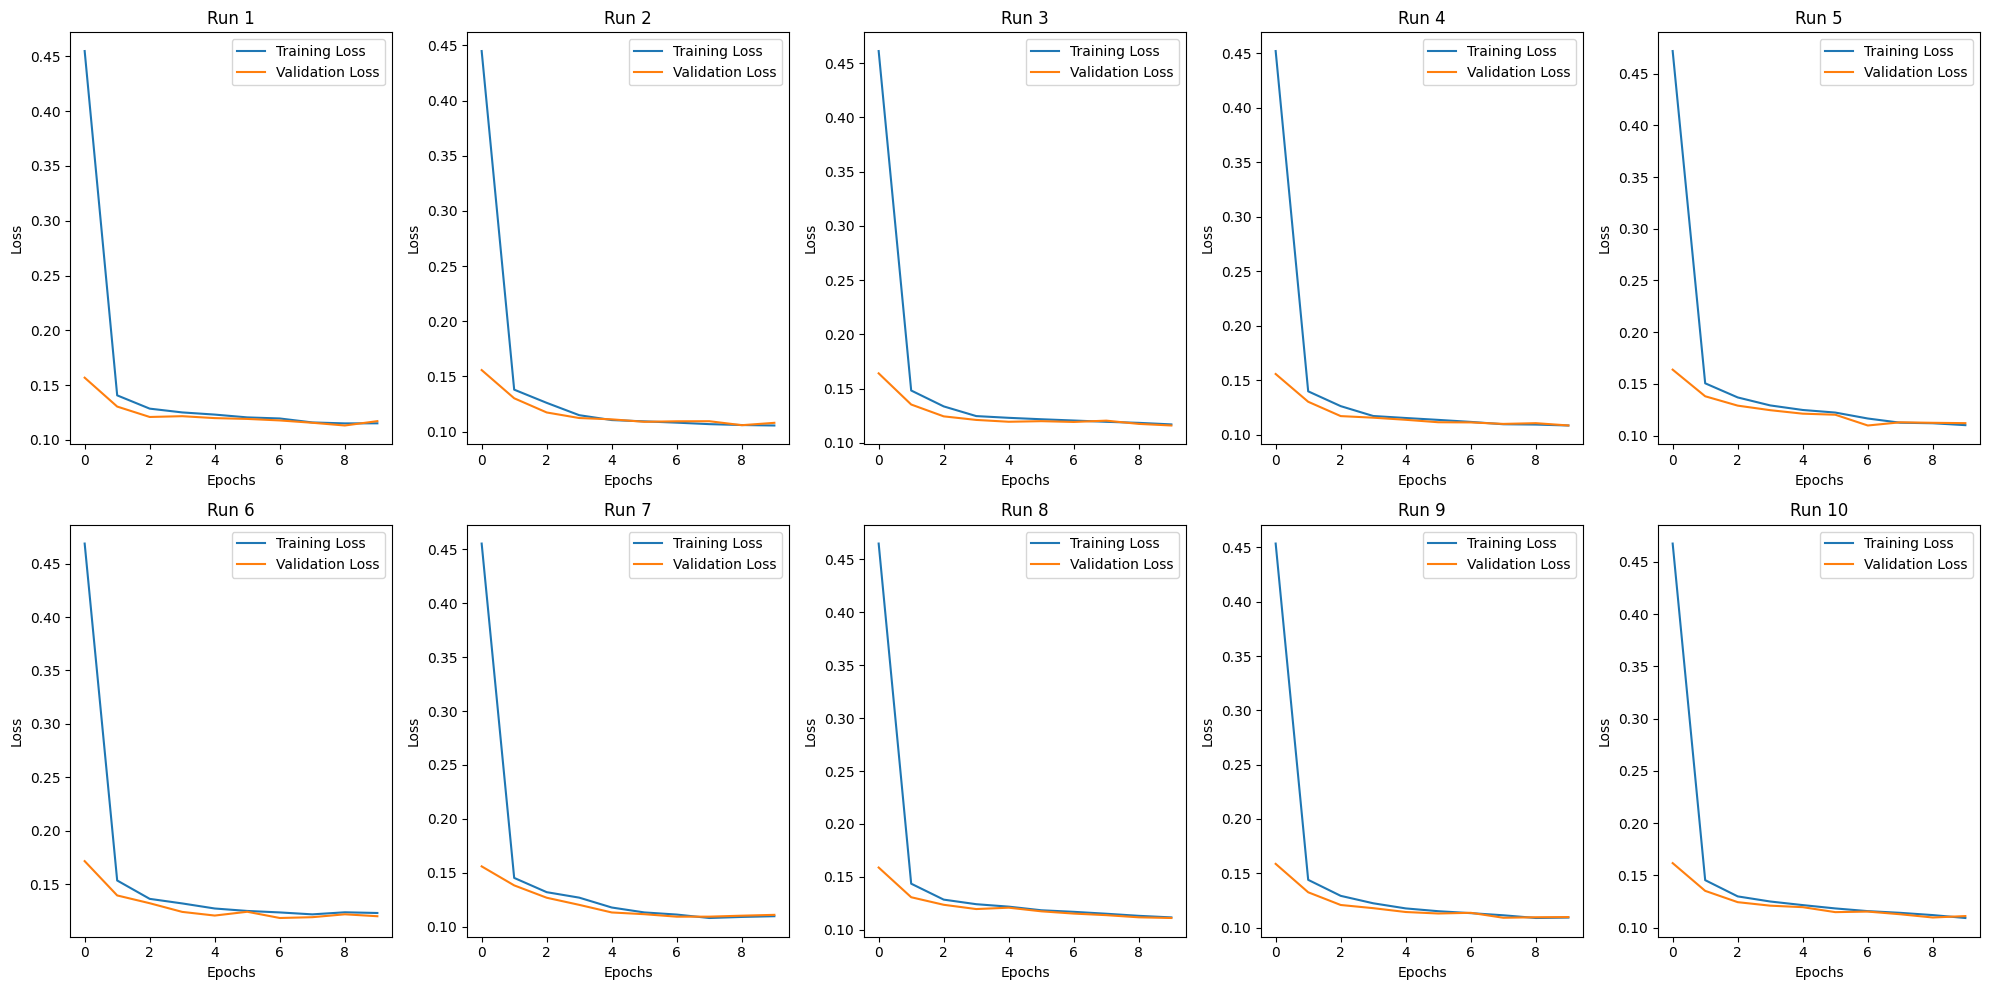

Mean Train MAE: 0.8307 ± 0.0098
Mean Validation MAE: 0.9089 ± 0.0062

Mean Train MSE: 1.0806 ± 0.0223
Mean Validation MSE: 1.2990 ± 0.0110

Mean Train RMSE: 1.0395 ± 0.0107
Mean Validation RMSE: 1.1397 ± 0.0048

Mean NDCG@5: 0.9720 ± 0.0003
Mean NDCG@10: 0.9717 ± 0.0003



In [12]:
def calculate_mean_ndcg(model, X_val_user, X_val_item, X_val_bert, y_val, scaler, k_list=[5, 10]):
    val_preds = model.predict([X_val_user, X_val_item, X_val_bert])
    val_preds = scaler.inverse_transform(val_preds).flatten()
    val_true = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
    
    user_ndcg_values = {k: [] for k in k_list}
    
    for user_id in np.unique(X_val_user):
        user_indices = np.where(X_val_user == user_id)[0]
        user_true_scores = val_true[user_indices]
        user_pred_scores = val_preds[user_indices]
        
        for k in k_list:
            ndcg_value = ndcg_cal(user_pred_scores, user_true_scores, k)
            user_ndcg_values[k].append(ndcg_value)
    
    mean_ndcg_values = {k: np.mean(user_ndcg_values[k]) for k in k_list}
    
    return mean_ndcg_values


train_mae_values = []
train_mse_values = []
train_rmse_values = []

val_mae_values = []
val_mse_values = []
val_rmse_values = []

ndcg_5_values = []
ndcg_10_values = []


def create_model(embedding_dim=32, hidden_size=32, dropout_rate=0.4, l2_lambda=0.005):
    user_input = tf.keras.layers.Input(shape=(1,), name='user_input')
    item_input = tf.keras.layers.Input(shape=(1,), name='item_input')
    bert_input = tf.keras.layers.Input(shape=(bert_vector_size,), name='bert_input')

    user_emb = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(user_input)
    item_emb = tf.keras.layers.Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(item_input)

    user_emb = tf.keras.layers.Flatten()(user_emb)
    item_emb = tf.keras.layers.Flatten()(item_emb)

    user_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(user_emb)
    user_emb = tf.keras.layers.BatchNormalization()(user_emb)
    user_emb = tf.keras.layers.Dropout(dropout_rate)(user_emb)
    
    item_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(item_emb)
    item_emb = tf.keras.layers.BatchNormalization()(item_emb)
    item_emb = tf.keras.layers.Dropout(dropout_rate)(item_emb)
    
    bert_input_processed = tf.keras.layers.Dense(hidden_size, activation='relu')(bert_input)
    bert_input_processed = tf.keras.layers.BatchNormalization()(bert_input_processed)
    bert_input_processed = tf.keras.layers.Dropout(dropout_rate)(bert_input_processed)

    x = tf.keras.layers.Concatenate()([user_emb, item_emb, bert_input_processed])

    x = tf.keras.layers.Dense(hidden_size, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=[user_input, item_input, bert_input], outputs=output)

    model.compile(optimizer='adam', loss='mse')

    return model



fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    model_instance = create_model()

    history = model_instance.fit(
        [X_train_user, X_train_item, X_train_bert], 
        y_train, 
        epochs=10, 
        batch_size=256, 
        validation_data=([X_val_user, X_val_item, X_val_bert], y_val),
        verbose=1,
        shuffle=True
    )



    ax = axs[i//5, i%5]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(f'Run {i+1}')
    ax.legend()

    train_preds = model_instance.predict([X_train_user, X_train_item, X_train_bert])
    val_preds = model_instance.predict([X_val_user, X_val_item, X_val_bert])

    train_preds = scaler.inverse_transform(train_preds)
    val_preds = scaler.inverse_transform(val_preds)
    y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_val_inverse = scaler.inverse_transform(y_val.reshape(-1, 1))


    train_mae, train_mse, train_rmse = calculate_metrics(y_train_inverse, train_preds)
    val_mae, val_mse, val_rmse = calculate_metrics(y_val_inverse, val_preds)

    train_mae_values.append(train_mae)
    train_mse_values.append(train_mse)
    train_rmse_values.append(train_rmse)

    val_mae_values.append(val_mae)
    val_mse_values.append(val_mse)
    val_rmse_values.append(val_rmse)

    mean_ndcg_values = calculate_mean_ndcg(model_instance, X_val_user, X_val_item, X_val_bert, y_val, scaler)
    ndcg_5_values.append(mean_ndcg_values[5])
    ndcg_10_values.append(mean_ndcg_values[10])

    print(f"Run {i+1} Training Metrics: MAE = {train_mae:.4f}, MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}")
    print(f"Run {i+1} Validation Metrics: MAE = {val_mae:.4f}, MSE = {val_mse:.4f}, RMSE = {val_rmse:.4f}")
    print(f"Run {i+1} NDCG@5: {mean_ndcg_values[5]:.4f}, NDCG@10: {mean_ndcg_values[10]:.4f}\n")


plt.tight_layout()
plt.show()  
    
    

mean_train_mae = np.mean(train_mae_values)
std_train_mae = np.std(train_mae_values)
mean_train_mse = np.mean(train_mse_values)
std_train_mse = np.std(train_mse_values)
mean_train_rmse = np.mean(train_rmse_values)
std_train_rmse = np.std(train_rmse_values)

mean_val_mae = np.mean(val_mae_values)
std_val_mae = np.std(val_mae_values)
mean_val_mse = np.mean(val_mse_values)
std_val_mse = np.std(val_mse_values)
mean_val_rmse = np.mean(val_rmse_values)
std_val_rmse = np.std(val_rmse_values)

mean_ndcg_5 = np.mean(ndcg_5_values)
std_ndcg_5 = np.std(ndcg_5_values)
mean_ndcg_10 = np.mean(ndcg_10_values)
std_ndcg_10 = np.std(ndcg_10_values)


print(f'Mean Train MAE: {mean_train_mae:.4f} ± {std_train_mae:.4f}')
print(f'Mean Validation MAE: {mean_val_mae:.4f} ± {std_val_mae:.4f}\n')

print(f'Mean Train MSE: {mean_train_mse:.4f} ± {std_train_mse:.4f}')
print(f'Mean Validation MSE: {mean_val_mse:.4f} ± {std_val_mse:.4f}\n')

print(f'Mean Train RMSE: {mean_train_rmse:.4f} ± {std_train_rmse:.4f}')
print(f'Mean Validation RMSE: {mean_val_rmse:.4f} ± {std_val_rmse:.4f}\n')

print(f'Mean NDCG@5: {mean_ndcg_5:.4f} ± {std_ndcg_5:.4f}')
print(f'Mean NDCG@10: {mean_ndcg_10:.4f} ± {std_ndcg_10:.4f}\n')

In [13]:
from sklearn.decomposition import PCA

def apply_pca(train_data, val_data, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold)
    train_data_pca = pca.fit_transform(train_data)
    val_data_pca = pca.transform(val_data)
    return train_data_pca, val_data_pca, pca

train_bert_matrix = np.array(X_train['Bert'].tolist())
val_bert_matrix = np.array(X_val['Bert'].tolist())

train_bert_matrix_pca, val_bert_matrix_pca, pca = apply_pca(train_bert_matrix, val_bert_matrix, variance_threshold=0.90)

print(f"Original dimensionality: {train_bert_matrix.shape[1]}")
print(f"Reduced dimensionality: {train_bert_matrix_pca.shape[1]}")

X_train['Bert_pca'] = list(train_bert_matrix_pca)
X_val['Bert_pca'] = list(val_bert_matrix_pca)


Original dimensionality: 768
Reduced dimensionality: 146


## 5

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - loss: 1.3378 - val_loss: 0.1606
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1445 - val_loss: 0.1277
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1244 - val_loss: 0.1192
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1166 - val_loss: 0.1143
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1117 - val_loss: 0.1118
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1099 - val_loss: 0.1118
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1086 - val_loss: 0.1117
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1090 - val_loss: 0.1102
Epoch 9/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1081 - val_loss: 0.1106
Epoch 10/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1059 - val_loss: 0.1082
2505/2505 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Run 1 Traini

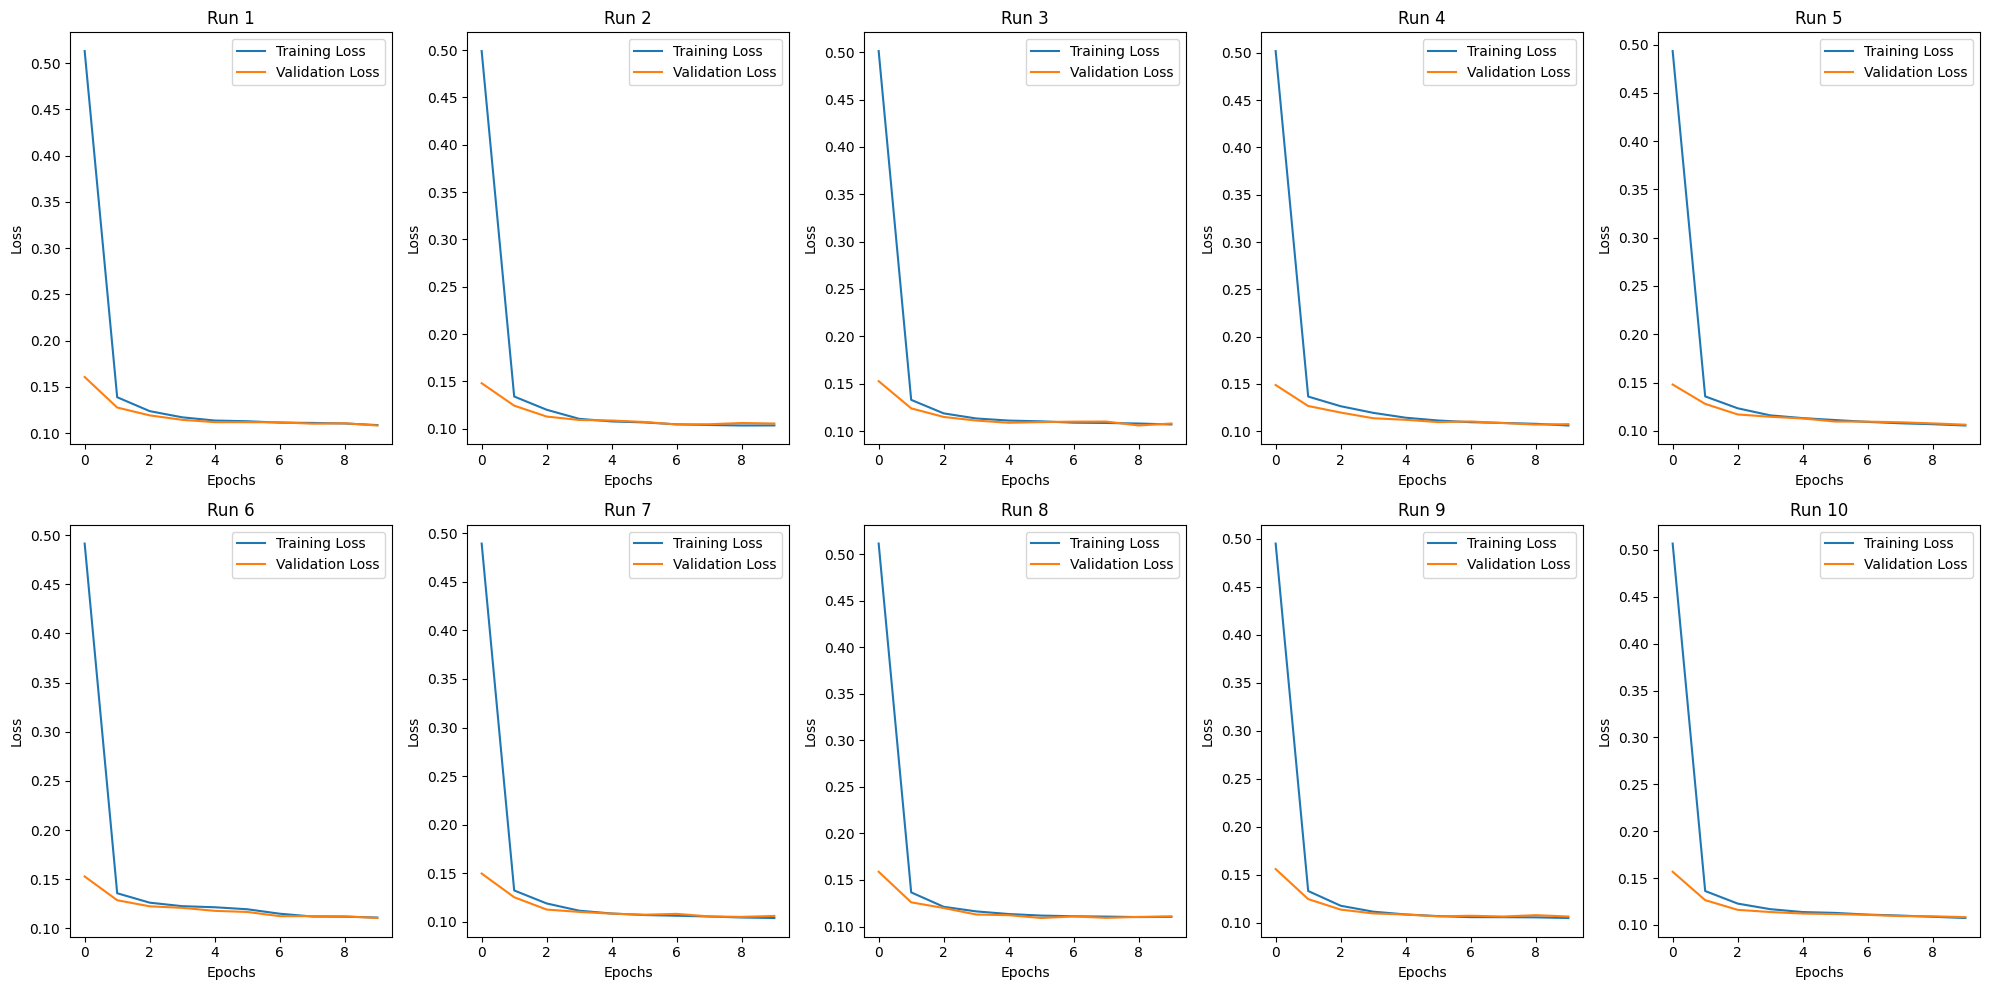

Mean Train MAE: 0.8195 ± 0.0124
Mean Validation MAE: 0.8991 ± 0.0072

Mean Train MSE: 1.0549 ± 0.0228
Mean Validation MSE: 1.2736 ± 0.0091

Mean Train RMSE: 1.0270 ± 0.0110
Mean Validation RMSE: 1.1285 ± 0.0040

Mean NDCG@5: 0.9743 ± 0.0002
Mean NDCG@10: 0.9740 ± 0.0002



In [17]:
X_train_bert_pca = np.array(X_train['Bert_pca'].tolist())
X_val_bert_pca = np.array(X_val['Bert_pca'].tolist())



bert_vector_size = X_train_bert_pca.shape[1]


train_mae_values = []
train_mse_values = []
train_rmse_values = []

val_mae_values = []
val_mse_values = []
val_rmse_values = []

ndcg_5_values = []
ndcg_10_values = []


def calculate_mean_ndcg(model, X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert, y_val, scaler, k_list=[5, 10]):
    val_preds = model.predict([X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert])
    val_preds = scaler.inverse_transform(val_preds).flatten()
    val_true = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
    
    user_ndcg_values = {k: [] for k in k_list}
    
    for user_id in np.unique(X_val_user):
        user_indices = np.where(X_val_user == user_id)[0]
        user_true_scores = val_true[user_indices]
        user_pred_scores = val_preds[user_indices]
        
        for k in k_list:
            ndcg_value = ndcg_cal(user_pred_scores, user_true_scores, k)
            user_ndcg_values[k].append(ndcg_value)
    
    mean_ndcg_values = {k: np.mean(user_ndcg_values[k]) for k in k_list}
    
    return mean_ndcg_values


def create_model(embedding_dim=32, hidden_size=32, dropout_rate=0.4, l2_lambda=0.005):
    user_input = tf.keras.layers.Input(shape=(1,), name='user_input')
    item_input = tf.keras.layers.Input(shape=(1,), name='item_input')
    category_input = tf.keras.layers.Input(shape=(1,), name='category_input')
    vendor_input = tf.keras.layers.Input(shape=(1,), name='vendor_input')
    vendor_city_input = tf.keras.layers.Input(shape=(1,), name='vendor_city_input')
    bert_input = tf.keras.layers.Input(shape=(bert_vector_size,), name='bert_input')

    user_emb = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(user_input)
    item_emb = tf.keras.layers.Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(item_input)
    category_emb = tf.keras.layers.Embedding(input_dim=num_categories, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(category_input)
    vendor_emb = tf.keras.layers.Embedding(input_dim=num_vendors, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(vendor_input)
    vendor_city_emb = tf.keras.layers.Embedding(input_dim=num_vendor_cities, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(vendor_city_input)

    user_emb = tf.keras.layers.Flatten()(user_emb)
    item_emb = tf.keras.layers.Flatten()(item_emb)
    category_emb = tf.keras.layers.Flatten()(category_emb)
    vendor_emb = tf.keras.layers.Flatten()(vendor_emb)
    vendor_city_emb = tf.keras.layers.Flatten()(vendor_city_emb)

    user_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(user_emb)
    user_emb = tf.keras.layers.BatchNormalization()(user_emb)
    user_emb = tf.keras.layers.Dropout(dropout_rate)(user_emb)
    
    item_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(item_emb)
    item_emb = tf.keras.layers.BatchNormalization()(item_emb)
    item_emb = tf.keras.layers.Dropout(dropout_rate)(item_emb)
    
    category_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(category_emb)
    category_emb = tf.keras.layers.BatchNormalization()(category_emb)
    category_emb = tf.keras.layers.Dropout(dropout_rate)(category_emb)
    
    vendor_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(vendor_emb)
    vendor_emb = tf.keras.layers.BatchNormalization()(vendor_emb)
    vendor_emb = tf.keras.layers.Dropout(dropout_rate)(vendor_emb)
    
    vendor_city_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(vendor_city_emb)
    vendor_city_emb = tf.keras.layers.BatchNormalization()(vendor_city_emb)
    vendor_city_emb = tf.keras.layers.Dropout(dropout_rate)(vendor_city_emb)

    bert_input_processed = tf.keras.layers.Dense(hidden_size, activation='relu')(bert_input)
    bert_input_processed = tf.keras.layers.BatchNormalization()(bert_input_processed)
    bert_input_processed = tf.keras.layers.Dropout(dropout_rate)(bert_input_processed)

    x = tf.keras.layers.Concatenate()([user_emb, item_emb, category_emb, vendor_emb, vendor_city_emb, bert_input_processed])

    x = tf.keras.layers.Dense(hidden_size, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=[user_input, item_input, category_input, vendor_input, vendor_city_input, bert_input], outputs=output)

    model.compile(optimizer='adam', loss='mse')

    return model



fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    model_instance = create_model()

    history = model_instance.fit(
        [X_train_user, X_train_item, X_train_category, X_train_vendor, X_train_vendor_city, X_train_bert_pca], 
        y_train, 
        epochs=10, 
        batch_size=256, 
        validation_data=([X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert_pca], y_val),
        verbose=1,
        shuffle=True
    )



    ax = axs[i//5, i%5]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(f'Run {i+1}')
    ax.legend()

    train_preds = model_instance.predict([X_train_user, X_train_item, X_train_category, X_train_vendor, X_train_vendor_city, X_train_bert_pca])
    val_preds = model_instance.predict([X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert_pca])

    train_preds = scaler.inverse_transform(train_preds)
    val_preds = scaler.inverse_transform(val_preds)
    y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_val_inverse = scaler.inverse_transform(y_val.reshape(-1, 1))

    train_mae, train_mse, train_rmse = calculate_metrics(y_train_inverse, train_preds)
    val_mae, val_mse, val_rmse = calculate_metrics(y_val_inverse, val_preds)

    train_mae_values.append(train_mae)
    train_mse_values.append(train_mse)
    train_rmse_values.append(train_rmse)

    val_mae_values.append(val_mae)
    val_mse_values.append(val_mse)
    val_rmse_values.append(val_rmse)

    mean_ndcg_values = calculate_mean_ndcg(model_instance, X_val_user, X_val_item, X_val_category, X_val_vendor, X_val_vendor_city, X_val_bert_pca, y_val, scaler)
    ndcg_5_values.append(mean_ndcg_values[5])
    ndcg_10_values.append(mean_ndcg_values[10])

    print(f"Run {i+1} Training Metrics: MAE = {train_mae:.4f}, MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}")
    print(f"Run {i+1} Validation Metrics: MAE = {val_mae:.4f}, MSE = {val_mse:.4f}, RMSE = {val_rmse:.4f}")
    print(f"Run {i+1} NDCG@5: {mean_ndcg_values[5]:.4f}, NDCG@10: {mean_ndcg_values[10]:.4f}\n")


plt.tight_layout()
plt.show()  
    
    

mean_train_mae = np.mean(train_mae_values)
std_train_mae = np.std(train_mae_values)
mean_train_mse = np.mean(train_mse_values)
std_train_mse = np.std(train_mse_values)
mean_train_rmse = np.mean(train_rmse_values)
std_train_rmse = np.std(train_rmse_values)

mean_val_mae = np.mean(val_mae_values)
std_val_mae = np.std(val_mae_values)
mean_val_mse = np.mean(val_mse_values)
std_val_mse = np.std(val_mse_values)
mean_val_rmse = np.mean(val_rmse_values)
std_val_rmse = np.std(val_rmse_values)

mean_ndcg_5 = np.mean(ndcg_5_values)
std_ndcg_5 = np.std(ndcg_5_values)
mean_ndcg_10 = np.mean(ndcg_10_values)
std_ndcg_10 = np.std(ndcg_10_values)


print(f'Mean Train MAE: {mean_train_mae:.4f} ± {std_train_mae:.4f}')
print(f'Mean Validation MAE: {mean_val_mae:.4f} ± {std_val_mae:.4f}\n')

print(f'Mean Train MSE: {mean_train_mse:.4f} ± {std_train_mse:.4f}')
print(f'Mean Validation MSE: {mean_val_mse:.4f} ± {std_val_mse:.4f}\n')

print(f'Mean Train RMSE: {mean_train_rmse:.4f} ± {std_train_rmse:.4f}')
print(f'Mean Validation RMSE: {mean_val_rmse:.4f} ± {std_val_rmse:.4f}\n')

print(f'Mean NDCG@5: {mean_ndcg_5:.4f} ± {std_ndcg_5:.4f}')
print(f'Mean NDCG@10: {mean_ndcg_10:.4f} ± {std_ndcg_10:.4f}\n')



## 6

Epoch 1/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - loss: 1.2022 - val_loss: 0.1614
Epoch 2/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1443 - val_loss: 0.1253
Epoch 3/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1175 - val_loss: 0.1120
Epoch 4/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1094 - val_loss: 0.1091
Epoch 5/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1072 - val_loss: 0.1080
Epoch 6/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1040 - val_loss: 0.1060
Epoch 7/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1022 - val_loss: 0.1067
Epoch 8/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1018 - val_loss: 0.1061
Epoch 9/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1008 - val_loss: 0.1047
Epoch 10/10
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1004 - val_loss: 0.1050
2505/2505 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
627/627 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Run 1 Traini

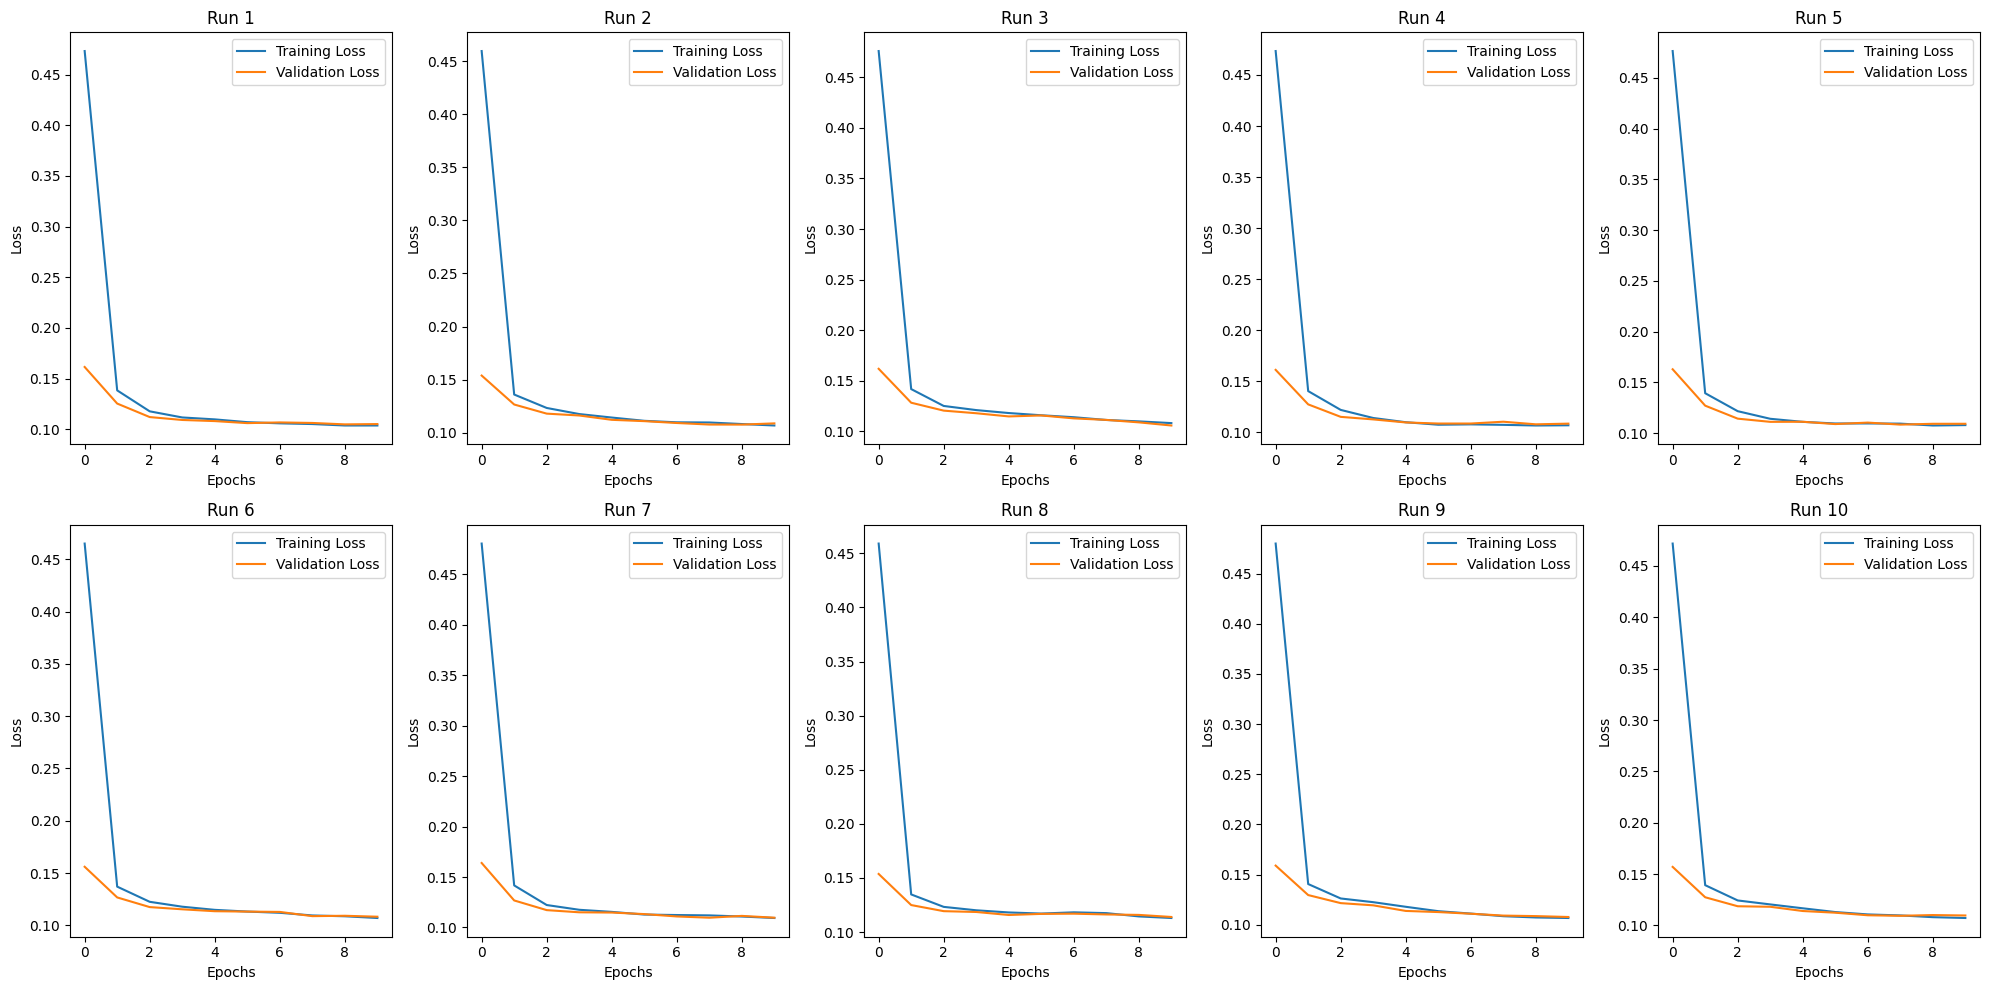

Mean Train MAE: 0.8260 ± 0.0084
Mean Validation MAE: 0.9063 ± 0.0062

Mean Train MSE: 1.0693 ± 0.0140
Mean Validation MSE: 1.2940 ± 0.0081

Mean Train RMSE: 1.0340 ± 0.0068
Mean Validation RMSE: 1.1376 ± 0.0036

Mean NDCG@5: 0.9720 ± 0.0005
Mean NDCG@10: 0.9717 ± 0.0004



In [ ]:
def calculate_mean_ndcg(model, X_val_user, X_val_item, X_val_bert, y_val, scaler, k_list=[5, 10]):
    val_preds = model.predict([X_val_user, X_val_item, X_val_bert])
    val_preds = scaler.inverse_transform(val_preds).flatten()
    val_true = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
    
    user_ndcg_values = {k: [] for k in k_list}
    
    for user_id in np.unique(X_val_user):
        user_indices = np.where(X_val_user == user_id)[0]
        user_true_scores = val_true[user_indices]
        user_pred_scores = val_preds[user_indices]
        
        for k in k_list:
            ndcg_value = ndcg_cal(user_pred_scores, user_true_scores, k)
            user_ndcg_values[k].append(ndcg_value)
    
    mean_ndcg_values = {k: np.mean(user_ndcg_values[k]) for k in k_list}
    
    return mean_ndcg_values


train_mae_values = []
train_mse_values = []
train_rmse_values = []

val_mae_values = []
val_mse_values = []
val_rmse_values = []

ndcg_5_values = []
ndcg_10_values = []


def create_model(embedding_dim=32, hidden_size=32, dropout_rate=0.4, l2_lambda=0.005):
    user_input = tf.keras.layers.Input(shape=(1,), name='user_input')
    item_input = tf.keras.layers.Input(shape=(1,), name='item_input')
    bert_input = tf.keras.layers.Input(shape=(bert_vector_size,), name='bert_input')

    user_emb = tf.keras.layers.Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(user_input)
    item_emb = tf.keras.layers.Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=tf.keras.regularizers.l2(l2_lambda))(item_input)

    user_emb = tf.keras.layers.Flatten()(user_emb)
    item_emb = tf.keras.layers.Flatten()(item_emb)

    user_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(user_emb)
    user_emb = tf.keras.layers.BatchNormalization()(user_emb)
    user_emb = tf.keras.layers.Dropout(dropout_rate)(user_emb)
    
    item_emb = tf.keras.layers.Dense(hidden_size, activation='relu')(item_emb)
    item_emb = tf.keras.layers.BatchNormalization()(item_emb)
    item_emb = tf.keras.layers.Dropout(dropout_rate)(item_emb)
    
    bert_input_processed = tf.keras.layers.Dense(hidden_size, activation='relu')(bert_input)
    bert_input_processed = tf.keras.layers.BatchNormalization()(bert_input_processed)
    bert_input_processed = tf.keras.layers.Dropout(dropout_rate)(bert_input_processed)

    x = tf.keras.layers.Concatenate()([user_emb, item_emb, bert_input_processed])

    x = tf.keras.layers.Dense(hidden_size, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=[user_input, item_input, bert_input], outputs=output)

    model.compile(optimizer='adam', loss='mse')

    return model



fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    model_instance = create_model()

    history = model_instance.fit(
        [X_train_user, X_train_item, X_train_bert_pca], 
        y_train, 
        epochs=10, 
        batch_size=256, 
        validation_data=([X_val_user, X_val_item, X_val_bert_pca], y_val),
        verbose=1,
        shuffle=True
    )



    ax = axs[i//5, i%5]
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title(f'Run {i+1}')
    ax.legend()

    train_preds = model_instance.predict([X_train_user, X_train_item, X_train_bert_pca])
    val_preds = model_instance.predict([X_val_user, X_val_item, X_val_bert_pca])

    train_preds = scaler.inverse_transform(train_preds)
    val_preds = scaler.inverse_transform(val_preds)
    y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_val_inverse = scaler.inverse_transform(y_val.reshape(-1, 1))


    train_mae, train_mse, train_rmse = calculate_metrics(y_train_inverse, train_preds)
    val_mae, val_mse, val_rmse = calculate_metrics(y_val_inverse, val_preds)

    train_mae_values.append(train_mae)
    train_mse_values.append(train_mse)
    train_rmse_values.append(train_rmse)

    val_mae_values.append(val_mae)
    val_mse_values.append(val_mse)
    val_rmse_values.append(val_rmse)

    mean_ndcg_values = calculate_mean_ndcg(model_instance, X_val_user, X_val_item, X_val_bert_pca, y_val, scaler)
    ndcg_5_values.append(mean_ndcg_values[5])
    ndcg_10_values.append(mean_ndcg_values[10])

    print(f"Run {i+1} Training Metrics: MAE = {train_mae:.4f}, MSE = {train_mse:.4f}, RMSE = {train_rmse:.4f}")
    print(f"Run {i+1} Validation Metrics: MAE = {val_mae:.4f}, MSE = {val_mse:.4f}, RMSE = {val_rmse:.4f}")
    print(f"Run {i+1} NDCG@5: {mean_ndcg_values[5]:.4f}, NDCG@10: {mean_ndcg_values[10]:.4f}\n")


plt.tight_layout()
plt.show()
    
    

mean_train_mae = np.mean(train_mae_values)
std_train_mae = np.std(train_mae_values)
mean_train_mse = np.mean(train_mse_values)
std_train_mse = np.std(train_mse_values)
mean_train_rmse = np.mean(train_rmse_values)
std_train_rmse = np.std(train_rmse_values)

mean_val_mae = np.mean(val_mae_values)
std_val_mae = np.std(val_mae_values)
mean_val_mse = np.mean(val_mse_values)
std_val_mse = np.std(val_mse_values)
mean_val_rmse = np.mean(val_rmse_values)
std_val_rmse = np.std(val_rmse_values)

mean_ndcg_5 = np.mean(ndcg_5_values)
std_ndcg_5 = np.std(ndcg_5_values)
mean_ndcg_10 = np.mean(ndcg_10_values)
std_ndcg_10 = np.std(ndcg_10_values)


print(f'Mean Train MAE: {mean_train_mae:.4f} ± {std_train_mae:.4f}')
print(f'Mean Validation MAE: {mean_val_mae:.4f} ± {std_val_mae:.4f}\n')

print(f'Mean Train MSE: {mean_train_mse:.4f} ± {std_train_mse:.4f}')
print(f'Mean Validation MSE: {mean_val_mse:.4f} ± {std_val_mse:.4f}\n')

print(f'Mean Train RMSE: {mean_train_rmse:.4f} ± {std_train_rmse:.4f}')
print(f'Mean Validation RMSE: {mean_val_rmse:.4f} ± {std_val_rmse:.4f}\n')

print(f'Mean NDCG@5: {mean_ndcg_5:.4f} ± {std_ndcg_5:.4f}')
print(f'Mean NDCG@10: {mean_ndcg_10:.4f} ± {std_ndcg_10:.4f}\n')

## 7-DNNRec

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import ndcg_score
import pandas as pd

import numpy as np
import sklearn
import os
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import pickle 
from sklearn import metrics
from sklearn import feature_extraction, preprocessing


df = pd.read_pickle('/kaggle/input/basalam-100k-data/basalam_dataset_5.pkl')

user_encoder = LabelEncoder()
product_encoder = LabelEncoder()
genre_encoder = LabelEncoder()
df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['product_id'] = product_encoder.fit_transform(df['product_id'])
df['genre_idx'] = genre_encoder.fit_transform(df['category_name'])

dftrain, dfvalid = train_test_split(df, test_size=0.2, stratify=df['user_id'], random_state=42)


myvec_tag=feature_extraction.text.CountVectorizer (ngram_range=(1,1),lowercase=True,max_features=100)
one_hot_tag_train=myvec_tag.fit_transform(dftrain['product_name']) 
one_hot_tag_valid=myvec_tag.transform(dfvalid['product_name'])

myvec_title=feature_extraction.text.CountVectorizer (ngram_range=(1,1),lowercase=True,max_features=250)
one_hot_title_train=myvec_title.fit_transform(dftrain['product_name']) 
one_hot_title_valid=myvec_title.transform(dfvalid['product_name'])

df_sideinfo_title_train = pd.DataFrame(one_hot_title_train.todense(), columns=['f_title_' + x for x in myvec_title.get_feature_names_out()])
df_sideinfo_tag_train = pd.DataFrame(one_hot_tag_train.todense(), columns=['f_tag_' + x for x in myvec_tag.get_feature_names_out()])

df_sideinfo_title_valid=pd.DataFrame(one_hot_title_valid.todense(),columns=['f_title_'+x for x in myvec_title.get_feature_names_out()])
df_sideinfo_tag_valid=pd.DataFrame(one_hot_tag_valid.todense(),columns=['f_tag_'+x for x in myvec_tag.get_feature_names_out()])

df_sideinfo_title_train.index = dftrain.index
df_sideinfo_tag_train.index = dftrain.index

df_sideinfo_title_valid.index = dfvalid.index
df_sideinfo_tag_valid.index = dfvalid.index

dftrain=pd.concat([dftrain,df_sideinfo_title_train,df_sideinfo_tag_train],axis=1)
dfvalid=pd.concat([dfvalid,df_sideinfo_title_valid,df_sideinfo_tag_valid],axis=1)

denseCols=dftrain.columns[dftrain.columns.str.startswith('f_t')].tolist()


catCols=['genre_idx']

class cfdata (torch.utils.data.dataset.Dataset):
    def __init__(self,dfX,dfY,denseCols,catCols):
        self.dfX,self.dfY=dfX,dfY
        self.denseCols=denseCols
        self.catCols=catCols
        
    def __len__ (self):
        return self.dfX.shape[0]
    
    def __getitem__ (self, idx):
        return torch.FloatTensor(self.dfX.iloc[idx].values),torch.FloatTensor([self.dfY.values[idx]])

dstrain=cfdata(dftrain[['user_id','product_id']+denseCols+catCols],dftrain['star'],denseCols,catCols)
dsvalid=cfdata(dfvalid[['user_id','product_id']+denseCols+catCols],dfvalid['star'],denseCols,catCols)

bs=64

dltrain=DataLoader(dstrain,bs,True)
dlvalid=DataLoader(dsvalid,bs,False)

# emb_szs=[(dftrain[col].nunique(),min(50,dftrain[col].nunique()//100)) for col in catCols]

n_users=len(df['user_id'].unique()) + 1
n_items=len(df['product_id'].unique()) + 1
n_genre=len(df['genre_idx'].unique())
n_emb_user=25
n_emb_item=25
n_emb_genre=25
min_rating=min(dftrain['star'])
max_rating=max(dftrain['star'])
dropout_e=0.2

hidden=[20,25,10]
dropouts=[0.4,0.4,0.4]

class cf(nn.Module):    
    def __init__(self,n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,autoenc_cols,pretrain_wts,\
                 catCols,n_genre,n_emb_genre,dropout_e=0.01,hidden=[15,5],dropouts=[0.2,0.2],error_type="mse"):
        super().__init__()
        self.n_users,self.n_emb_user,self.n_emb_item,self.n_items,self.min_rating,self.max_rating=\
                    n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating
        self.dropout_e,self.hidden,self.dropouts=dropout_e,hidden,dropouts
        self.autoenc_cols,self.len_dense_cols=autoenc_cols,len(autoenc_cols)
        self.catCols,self.n_emb_genre=catCols,n_emb_genre
        self.n_genre=n_genre
        
        self.create_architecture()
        self.init_parameters()
        
        if pretrain_wts is not None:
            self.emb_user.weight.data=torch.FloatTensor(pretrain_wts[0])
            self.emb_item.weight.data=torch.FloatTensor(pretrain_wts[1])
            self.ub.weight.data=torch.FloatTensor(pretrain_wts[2])
            self.ib.weight.data=torch.FloatTensor(pretrain_wts[3])

        if error_type!="mse":
            self.criterion=nn.L1Loss()
        else:
            self.criterion=nn.MSELoss()
        
    def create_architecture(self):
        self.emb_user=nn.Embedding(self.n_users,self.n_emb_user)
        self.emb_item=nn.Embedding(self.n_items,self.n_emb_item)
        self.ub=nn.Embedding(self.n_users,1)
        self.ib=nn.Embedding(self.n_items,1)
        self.embs_cat=nn.Embedding(self.n_genre,self.n_emb_genre)
        
        self.emb_dropout=nn.Dropout(self.dropout_e)

        
        self.lin1= nn.Sequential(nn.Linear(self.n_emb_user+self.n_emb_item,self.hidden[0]),
                    nn.LeakyReLU(),
                    nn.Dropout(p=dropouts[0]) )
        self.lin_bias=nn.Linear(3,1)
        self.lin_cat= nn.Sequential (nn.Linear(self.n_emb_genre,self.hidden[2]//2),
                                nn.LeakyReLU(),
                                nn.Dropout(p=dropouts[2]))
        self.lin2= nn.Sequential (nn.Linear(self.len_dense_cols,self.hidden[1]),
                    nn.LeakyReLU(),
                    nn.Dropout(p=dropouts[1]) )
        self.lin3= nn.Sequential (nn.Linear(self.hidden[0]+self.hidden[1]+1+self.hidden[2]//2,self.hidden[2]),
                    nn.LeakyReLU(),
                    nn.Dropout(p=dropouts[2]))
        self.lin4=nn.Linear(self.hidden[2],1)
        self.sigmoid=nn.Sigmoid()
        
        
    def init_parameters(self):
        nn.init.kaiming_normal_(self.emb_user.weight.data)
        nn.init.kaiming_normal_(self.emb_item.weight.data)
        nn.init.zeros_(self.ub.weight.data)
        nn.init.zeros_(self.ib.weight.data)
        nn.init.kaiming_normal_(self.lin1[0].weight.data)
        nn.init.kaiming_normal_(self.lin2[0].weight.data)
        nn.init.kaiming_normal_(self.lin3[0].weight.data)
        #nn.init.kaiming_normal_(lin)
       
    def forward (self,Xb,Yb):
        users=Xb[:,0].long()
        items=Xb[:,1].long()
        users=self.emb_dropout(self.emb_user(users))
        items=self.emb_dropout(self.emb_item(items))
        users_bias=self.emb_dropout(self.ub(Xb[:,0].long()))
        items_bias=self.emb_dropout(self.ib(Xb[:,1].long()))
        
        

        embed=torch.cat([users,items],1)
        out1=self.lin1(embed)
        bias=torch.cat([users_bias,items_bias,users_bias+items_bias],1)
        biased=self.lin_bias(bias)
           
        
        denses=Xb[:,2:(2+self.len_dense_cols)]
        out2=self.lin2(denses)
                  
        cats=Xb[:,(2+self.len_dense_cols):].long()
        embed_cat=self.emb_dropout(self.embs_cat(cats))
        out_cat=self.lin_cat(embed_cat)
        out_cat = out_cat.view(out_cat.size(0), -1) 
        out3=torch.cat([out1,out2,biased,out_cat],1)
        
        out4=self.lin3(out3)
        
        out5=self.lin4(out4)
        
        out=self.sigmoid(out5)
        
        preds=out*(self.max_rating-self.min_rating)+self.min_rating
        #preds=preds.view(-1)
        
        
        l2_lambda = 0.005
        l2_reg = 0

        for param in self.lin1.parameters():
            l2_reg += torch.norm(param, 2)
        for param in self.lin2.parameters():
            l2_reg += torch.norm(param, 2)
        for param in self.lin3.parameters():
            l2_reg += torch.norm(param, 2)

        for param in self.emb_user.parameters():
            l2_reg += torch.norm(param, 2)
        for param in self.emb_item.parameters():
            l2_reg += torch.norm(param, 2)
        for param in self.embs_cat.parameters():
            l2_reg += torch.norm(param, 2)
        loss = self.criterion(preds, Yb) + l2_lambda * l2_reg
        
#         loss=self.criterion(preds,Yb)
        return preds,loss

pretrain_wts=None


class Learner():
    def __init__(self,model,optimizer,metric_fn,device,bptt=12,print_every=5,clip_val=None,\
                 cycle_mult=0,lr_decay=0.7,wd_mult=1.1,start_lr=2e-2, end_lr=5e-4,error_type="mse"):
        self.model,self.optimizer,self.metric_fn,self.device,self.print_every,self.bptt,self.losses,self.clip_val=\
            model,optimizer,metric_fn,device,print_every,bptt,[],clip_val
        self.n_epochs=1
        self.cycle_mult,self.lr_decay=cycle_mult,lr_decay
        self.wd_mult=wd_mult
        for param_group in self.optimizer.param_groups:
            self.start_lr=param_group['lr']
            self.start_wd=param_group['weight_decay']
        self.wd=self.start_wd
        self.lr=self.start_lr
        self.end_lr=end_lr
        self.n_epoch=0
        self.lrs=[1e-2,5e-3,1e-4,5e-4]
        self.preds,self.preds_valid,self.trainY,self.actual=[],[],[],[]
        self.ratio=self.end_lr/self.start_lr
        self.num_steps=self.cycle_mult
        self.reset_cycle=self.cycle_mult
        self.error_type=error_type
        self.scores=[]
        self.generate_scores=False
        
    def fit (self,Xb,Yb,mode_train=True):
        if mode_train:
            self.model.train()
        else:
            self.model.eval()
        
        #import pdb
        #pdb.set_trace()
        
        preds,loss=self.model(Xb,Yb)
        predss=preds
     
        if mode_train:
            if 1==0:
                lr =self.lrs[torch.randint(0,4,(1,))]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        myloss=loss.item()
    
        
        with torch.no_grad():
            if self.error_type == "mse":
                acc=nn.L1Loss() (preds,Yb)
                myrmse=np.sqrt(myloss)
            else:
                acc=nn.MSELoss() (preds,Yb)
                myrmse=np.sqrt(acc.item())
            acc=acc.item()
                 
        if mode_train==False:
            if self.generate_scores:
                self.scores.append(preds.detach().cpu().numpy().flatten())
        del preds
        del loss
        
        if self.clip_val is not None:
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.clip_val)
        
        return myloss, acc, myrmse, predss
    
    def lr_find (self,start_lr,end_lr,iterator,n_batch):
        losses,lrs=[],[]
        ratio=end_lr/start_lr
        num_steps=n_batch
        lr=start_lr
        for i in range(num_steps):            
            lr=lr*(end_lr/start_lr)**(1/num_steps)
            lrs.append(lr)
        self.lrs=lrs
        self.run_epoch(iterator,mode_train=True,lrs=lrs)
    
    def run_epoch(self,iterator,mode_train,lrs=None):
        epoch_loss,epoch_acc,i,k=0,0,0,0
        epoch_rmse=0
        epoch_pred = []
        for Xb,Yb in iterator:
            Xb=Xb.to(self.device)
            Yb=Yb.to(self.device)
            
            if lrs is not None:
                lr=lrs[k]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr 
            
            loss,acc,myrmse,pred=self.fit(Xb,Yb,mode_train)
            
            if lrs is not None:
                self.losses.append(loss)

            epoch_loss+=loss
            epoch_acc+=acc
            epoch_rmse+=myrmse
            epoch_pred.append(pred)
            k=k+1
            if k%self.print_every == 0:
                if k:
                    print (f'Batch:{k} {epoch_loss/(k)}  ')  
                    torch.cuda.empty_cache()
        epoch_pred = torch.cat(epoch_pred, dim=0).to(self.device)
        epoch_loss=epoch_loss/len(iterator)
        epoch_acc=epoch_acc/len(iterator)
        epoch_rmse=epoch_rmse/len(iterator)
            
        return epoch_loss,epoch_acc,epoch_rmse,epoch_pred
    
    def plot_lrs(self, n_roll=1,ylim=None,xlim=None):
        import seaborn as sns
        ax=sns.lineplot(x=self.lrs,y=pd.Series(self.losses).rolling(n_roll).mean())
        ax.set_xscale('log')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate')
        if ylim is not None:
            plt.ylim(ylim)
        if xlim is not None:
            plt.xlim(xlim)

            

    def dcg2_cal(self, rank_scores):
        s = np.arange(2, len(rank_scores) + 2)
        x = 2 ** rank_scores
        dcg2 = np.sum((x - 1) / np.log2(s))
        return dcg2

    def ndcg_cal(self, r, scores, k):
        k = min(k, len(r))
        pos = np.argsort(r)[::-1]
        recom_list = pos[:k]
        rank_scores = scores[recom_list]
        m = self.dcg2_cal(rank_scores)
        real_scores = np.sort(rank_scores)[::-1][:k]
        n = self.dcg2_cal(real_scores)
        ndcg = m / n if n > 0 else 0.0
        return ndcg

        
    def calculate_mean_ndcg(self, preds, X_val_user, X_val_item, y_val, k_list=[5, 10]):
        val_true = y_val
        val_preds = preds.detach().cpu().numpy()

        user_ndcg_values = {k: [] for k in k_list}

        for user_id in np.unique(X_val_user):
            user_indices = np.where(X_val_user == user_id)[0]
            user_true_scores = val_true[user_indices]
            user_pred_scores = val_preds[user_indices]

            for k in k_list:
                ndcg_value = self.ndcg_cal(user_pred_scores, user_true_scores, k)
                user_ndcg_values[k].append(ndcg_value)

        mean_ndcg_values = {k: np.mean(user_ndcg_values[k]) for k in k_list}

        return mean_ndcg_values    
            

    def run_epochs(self,dltrain,dlvalid,n_epochs=1):              
        for epoch in range(n_epochs):                
            loss,acc,rmse,train_pred=self.run_epoch(dltrain,True)

            lossv,accv,rmsev,val_pred=self.run_epoch(dlvalid,mode_train=False)
           
            if self.error_type=="mse":
                loss_mse=loss
                loss_rmse=rmse
                loss_mae=acc
                lossv_mse=lossv
                lossv_rmse=rmsev
                lossv_mae=accv
                
            else:
                loss_mse=acc
                loss_rmse=rmse
                loss_mae=loss
                lossv_mse=accv
                lossv_rmse=rmsev
                lossv_mae=lossv
            

            print(f"Epoch: {epoch} | Learning rate: {self.lr:.4f} | Weight Decay: {self.wd:.4f}")
            print(f"Train Loss: {loss:.4f} | Valid Loss: {lossv:.4f}")
            print(f"Train RMSE: {loss_rmse:.4f} | Valid RMSE: {lossv_rmse:.4f}")
            print(f"Train MSE: {loss_mse:.4f} | Valid MSE: {lossv_mse:.4f}")
            print(f"Train MAE: {loss_mae:.4f} | Valid MAE: {lossv_mae:.4f}")


            if self.cycle_mult:
                if self.n_epoch==self.reset_cycle:
                    self.lr=self.start_lr
                    self.wd=self.start_wd
                    self.reset_cycle*=self.cycle_mult
                    #reset_cycle=self.n_epoch+reset_cycle
                    self.n_epoch=0
                    self.ratio=self.end_lr/self.start_lr
                    self.num_steps=self.reset_cycle
                else:
                    #self.lr*=(self.lr_decay**self.n_epoch)  
                    #if self.n_epoch>1:
                    self.wd*=self.wd_mult
                    self.lr=self.lr*(self.end_lr/self.start_lr)**(1/self.num_steps)
                    self.n_epoch+=1
        

                
            for param_group in self.optimizer.param_groups:
                param_group['lr']=self.lr
                param_group['weight_decay']=self.wd

        X_val_user = dlvalid.dataset.dfX['user_id'].values
        X_val_item = dlvalid.dataset.dfX['product_id'].values
        y_vals = dlvalid.dataset.dfY.values
        mean_ndcg_values = self.calculate_mean_ndcg(val_pred, X_val_user, X_val_item, y_vals)
               

        
        return loss_mse, loss_rmse, loss_mae, lossv_mse, lossv_rmse, lossv_mae, mean_ndcg_values[5], mean_ndcg_values[10]

        
# device='cuda'

# cfobj=cf(n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,denseCols,pretrain_wts,catCols,n_genre,n_emb_genre,dropout_e,hidden,dropouts,error_type="mse")
# cfobj=cfobj.to(device)

# wd=3e-4
# optimizer=torch.optim.Adam(cfobj.parameters(),lr=9e-3,betas=(0.9,0.999), weight_decay=wd)
# learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=9e-3,end_lr=3e-4,wd_mult=1.15)

# learner.run_epochs(dltrain,dlvalid,10)

In [15]:
train_mse = []
valid_mse = []
train_rmse = []
valid_rmse = []
train_mae = []
valid_mae = []
ndcg_5_list = []
ndcg_10_list = []
for i in range(10):
    print(f'Execution {i+1}')
    
    
    device='cuda'

    cfobj=cf(n_users,n_emb_user,n_emb_item,n_items,min_rating,max_rating,denseCols,pretrain_wts,catCols,n_genre,n_emb_genre,dropout_e,hidden,dropouts,error_type="mse")
    cfobj=cfobj.to(device)

    wd=3e-4
    optimizer=torch.optim.Adam(cfobj.parameters(),lr=9e-3,betas=(0.9,0.999), weight_decay=wd)
    learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=9e-3,end_lr=3e-4,wd_mult=1.15)

    loss_mse, loss_rmse, loss_mae, lossv_mse, lossv_rmse, lossv_mae, ndcg_5, ndcg_10 = learner.run_epochs(dltrain,dlvalid,5)
    
    
    train_mse.append(loss_mse)
    valid_mse.append(lossv_mse)
    train_rmse.append(loss_rmse)
    valid_rmse.append(lossv_rmse)
    train_mae.append(loss_mae)
    valid_mae.append(lossv_mae)
    ndcg_5_list.append(ndcg_5)
    ndcg_10_list.append(ndcg_10)
    print(f'NDCG 5: {ndcg_5:.4f}')
    print(f'NDCG 10: {ndcg_10:.4f}')

mean_ndcg_5 = np.mean(ndcg_5_list)
std_ndcg_5 = np.std(ndcg_5_list)
mean_ndcg_10 = np.mean(ndcg_10_list)
std_ndcg_10 = np.std(ndcg_10_list)
    
mean_train_mse = np.mean(train_mse)
std_train_mse = np.std(train_mse)
mean_valid_mse = np.mean(valid_mse)
std_valid_mse = np.std(valid_mse)

mean_train_rmse = np.mean(train_rmse)
std_train_rmse = np.std(train_rmse)
mean_valid_rmse = np.mean(valid_rmse)
std_valid_rmse = np.std(valid_rmse)

mean_train_mae = np.mean(train_mae)
std_train_mae = np.std(train_mae)
mean_valid_mae = np.mean(valid_mae)
std_valid_mae = np.std(valid_mae)
print('---------------------------------------------------')
print(f'Mean Train MSE: {mean_train_mse:.4f}, Std: {std_train_mse:.4f}')
print(f'Mean Valid MSE: {mean_valid_mse:.4f}, Std: {std_valid_mse:.4f}')
print(f'Mean Train RMSE: {mean_train_rmse:.4f}, Std: {std_train_rmse:.4f}')
print(f'Mean Valid RMSE: {mean_valid_rmse:.4f}, Std: {std_valid_rmse:.4f}')
print(f'Mean Train MAE: {mean_train_mae:.4f}, Std: {std_train_mae:.4f}')
print(f'Mean Valid MAE: {mean_valid_mae:.4f}, Std: {std_valid_mae:.4f}')

print(f'Mean NDCG 5: {mean_ndcg_5:.4f}, Std: {std_ndcg_5:.4f}')
print(f'Mean NDCG 10: {mean_ndcg_10:.4f}, Std: {std_ndcg_10:.4f}')

Execution 1
Epoch: 0 | Learning rate: 0.0090 | Weight Decay: 0.0003
Train Loss: 1.8676 | Valid Loss: 1.4749
Train RMSE: 1.3575 | Valid RMSE: 1.2104
Train MSE: 1.8676 | Valid MSE: 1.4749
Train MAE: 1.0233 | Valid MAE: 0.9523
Epoch: 1 | Learning rate: 0.0016 | Weight Decay: 0.0003
Train Loss: 1.2669 | Valid Loss: 1.3269
Train RMSE: 1.1208 | Valid RMSE: 1.1466
Train MSE: 1.2669 | Valid MSE: 1.3269
Train MAE: 0.8714 | Valid MAE: 0.8980
Epoch: 2 | Learning rate: 0.0003 | Weight Decay: 0.0004
Train Loss: 1.0975 | Valid Loss: 1.3256
Train RMSE: 1.0427 | Valid RMSE: 1.1458
Train MSE: 1.0975 | Valid MSE: 1.3256
Train MAE: 0.7989 | Valid MAE: 0.8946
Epoch: 3 | Learning rate: 0.0090 | Weight Decay: 0.0003
Train Loss: 1.3710 | Valid Loss: 1.3835
Train RMSE: 1.1662 | Valid RMSE: 1.1721
Train MSE: 1.3710 | Valid MSE: 1.3835
Train MAE: 0.9219 | Valid MAE: 0.9353
Epoch: 4 | Learning rate: 0.0038 | Weight Decay: 0.0003
Train Loss: 1.1784 | Valid Loss: 1.3360
Train RMSE: 1.0809 | Valid RMSE: 1.1511
Trai